<div style="background-color: #DADDB1; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Avocado Project</b>
</div>

**Project Description** 

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

**Some relevant columns in the dataset:**

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold

**Inspiration /Label**

The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

**Dataset Link-**

•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


<img src="https://pbs.twimg.com/profile_images/757274926424268800/CG0pGsPi_400x400.jpg" alt="Lamp" width="532" height="732">

<div style="background-color: #DADDB1; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Importing Libraries</b>
</div>

In [30]:
# Importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import missingno as msno
from scipy import stats

# Import the tqdm library for progress bars
from tqdm import tqdm

#Statistical Analysis
from scipy import stats
from scipy.stats import norm

# Scaler, Preprocessor, 
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

#Regressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor


#Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

#Evaluation & Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score


# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

<div style="background-color: #DADDB1; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Loading Dataset</b>
</div>

In [31]:
df = pd.read_csv("avocado.csv")
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [32]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [33]:
df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [34]:
df.sample()

Unnamed: 0        Date  AveragePrice  Total Volume    4046     4225  \
17089          16  2017-09-10          2.02       14718.3  178.69  2712.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
17089  113.06    11714.42    11246.85      467.57          0.0  organic  2017   

              region  
17089  SouthCarolina

**Comprehensive Overview for Dataset** 

**Features/Attributes:**

**Unnamed: 0:** An auto-generated or index column that typically represents a unique identifier for each row.

**Date:** The date of the observation, in the format "YYYY-MM-DD."

**AveragePrice:** The average price of a specific item, likely referring to avocados in this context.

**Total Volume:** The total volume of avocados sold.

**4046:** The quantity of avocados with PLU ("Price Look-Up" or "Product Look-Up" code) 4046 sold.

**4225:** The quantity of avocados with PLU 4225 sold.

**4770:** The quantity of avocados with PLU 4770 sold.

**Total Bags:** The total number of bags used for packaging avocados.

**Small Bags:** The number of small-sized bags used for packaging avocados.

**Large Bags:** The number of large-sized bags used for packaging avocados.

**XLarge Bags:** The number of extra-large-sized bags used for packaging avocados.

**type:** The type of avocados, possibly indicating whether they are conventional or organic.

**year:** The year of the observation.

**region:** The region or location where the avocados were sold, in this case, "Detroit."

**Label/Target:** 

**Condition : The dataset can be seen in two angles to find the region and find the average price.**

As per the provided guidelines, both tasks should be completed within a single file.

Task 1: The target variable is "Average Price," which is continuous data. Consequently, we will apply various regression models.

Task 2: The target variable is "Region," which falls into the category of categorical data. Therefore, we will employ various classification models."

**To confirm that my understanding of the dataset is accurate, I will conduct explanatory data analysis, visualization, and various other analyses.**


**Below Validating Dataset Assumptions:** Employing Explanatory Data Analysis and Visualizations to Confirm Understanding and Assumptions.

**Note**

"Instructions for the workflow: The initial exploratory data analysis (EDA) will be nearly identical for both tasks. Therefore, we will begin with EDA, and after completing it, we will proceed with Task 1 before moving on to Task 2."

<div style="background-color: #DADDB1; padding: 10px; text-align: center;">
    <b style="text-align: center;">Explanatory Data Analysis</b>
</div>

In [35]:
df.shape

(18249, 14)

In [36]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [37]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

**Observing the dataset, we note that some columns are currently in object format, requiring correction. Our target variable, 'Average Price,' falls into the continuous format, indicating a regression problem. Specifically, 'Average Price,' 'Total Volume,' '4046,' '4225,' '4770,' 'Total Bags,' 'Small Bags,' and 'Large Bags' are of float64 data type, 'type' is in object format, 'year' is represented as int64, and 'region' is also in object format. I am goint to address the data type correction later in our analysis.**

* It's evident that the dataset contains three distinguishable data types: integers, denoted as int64, floating-point numbers, denoted as float64, and object types. This differentiation in data types reflects the presence of both numeric and non-numeric values within the dataset.

**The 'Unnamed:0' feature is primarily a representation of the dataset's indices and does not carry any meaningful information. Therefore, we will eliminate it during the preprocessing stage.**

<div style="background-color: #DADDB1; padding: 10px; text-align: center;">
    <b style="text-align: center;">Checking Null Values</b>
</div>

In [39]:
df.isin(['NaN', 'Nan', 'nan', 'NA', ' ', '_', '0']).any()

Unnamed: 0      False
Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [40]:
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [41]:
df.isna().sum().sum()

0

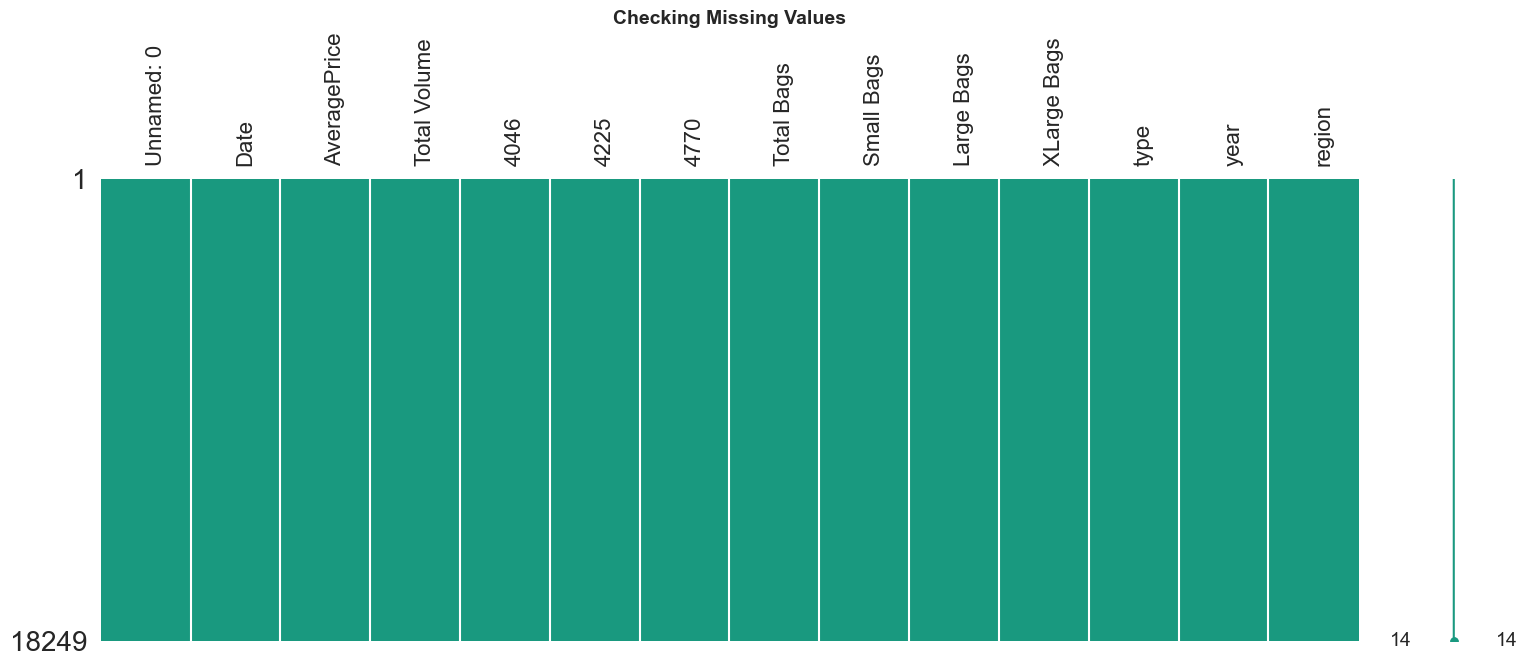

In [42]:
# Visiualizing missing data in DataFrame 
msno.matrix(df, color=( 0.1, 0.6, 0.5), figsize=(18, 6))
plt.title('Checking Missing Values', fontsize=14, fontweight='bold')
# Rotate x-axis labels to 0 degrees
plt.xticks(rotation=90)
plt.show()

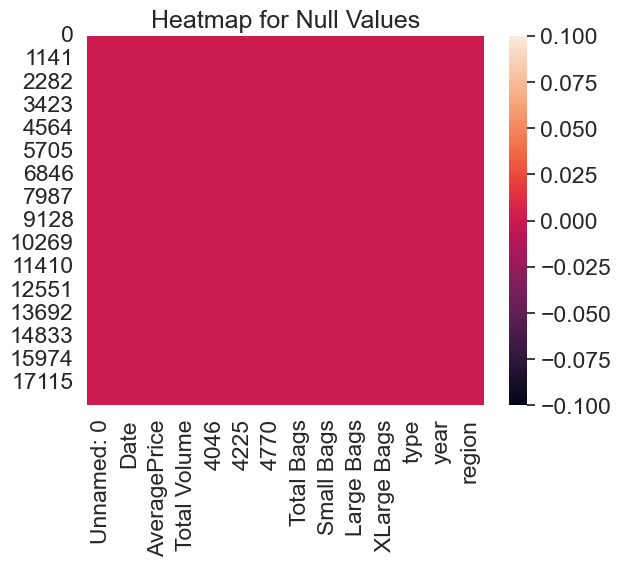

In [43]:
sns.heatmap(df.isnull())
plt.title("Heatmap for Null Values")
plt.show()

<div style="background-color: #DADDB1; padding: 10px; text-align: center;">
    <b style="text-align: center;">Checking Duplicate values</b>
</div>

In [44]:
#Checking the duplicate rows
print("\033[1mNumber of duplicated rows in the DataFrame:{}\033[0m".format(df.duplicated().sum()),'\n')

print('\033[1mVerifying the presence of duplicated data while inspecting each row individually:\033[0m\n')

print(df.duplicated())
print('\nCheck duplicates in overall dataset:', df.duplicated().sum())

Number of duplicated rows in the DataFrame:0 

Verifying the presence of duplicated data while inspecting each row individually:

0        False
1        False
2        False
3        False
4        False
         ...  
18244    False
18245    False
18246    False
18247    False
18248    False
Length: 18249, dtype: bool

Check duplicates in overall dataset: 0


<div style="background-color: #DADDB1; padding: 10px; text-align: center;">
    <b style="text-align: center;">Information about a DataFrame</b>
</div>

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


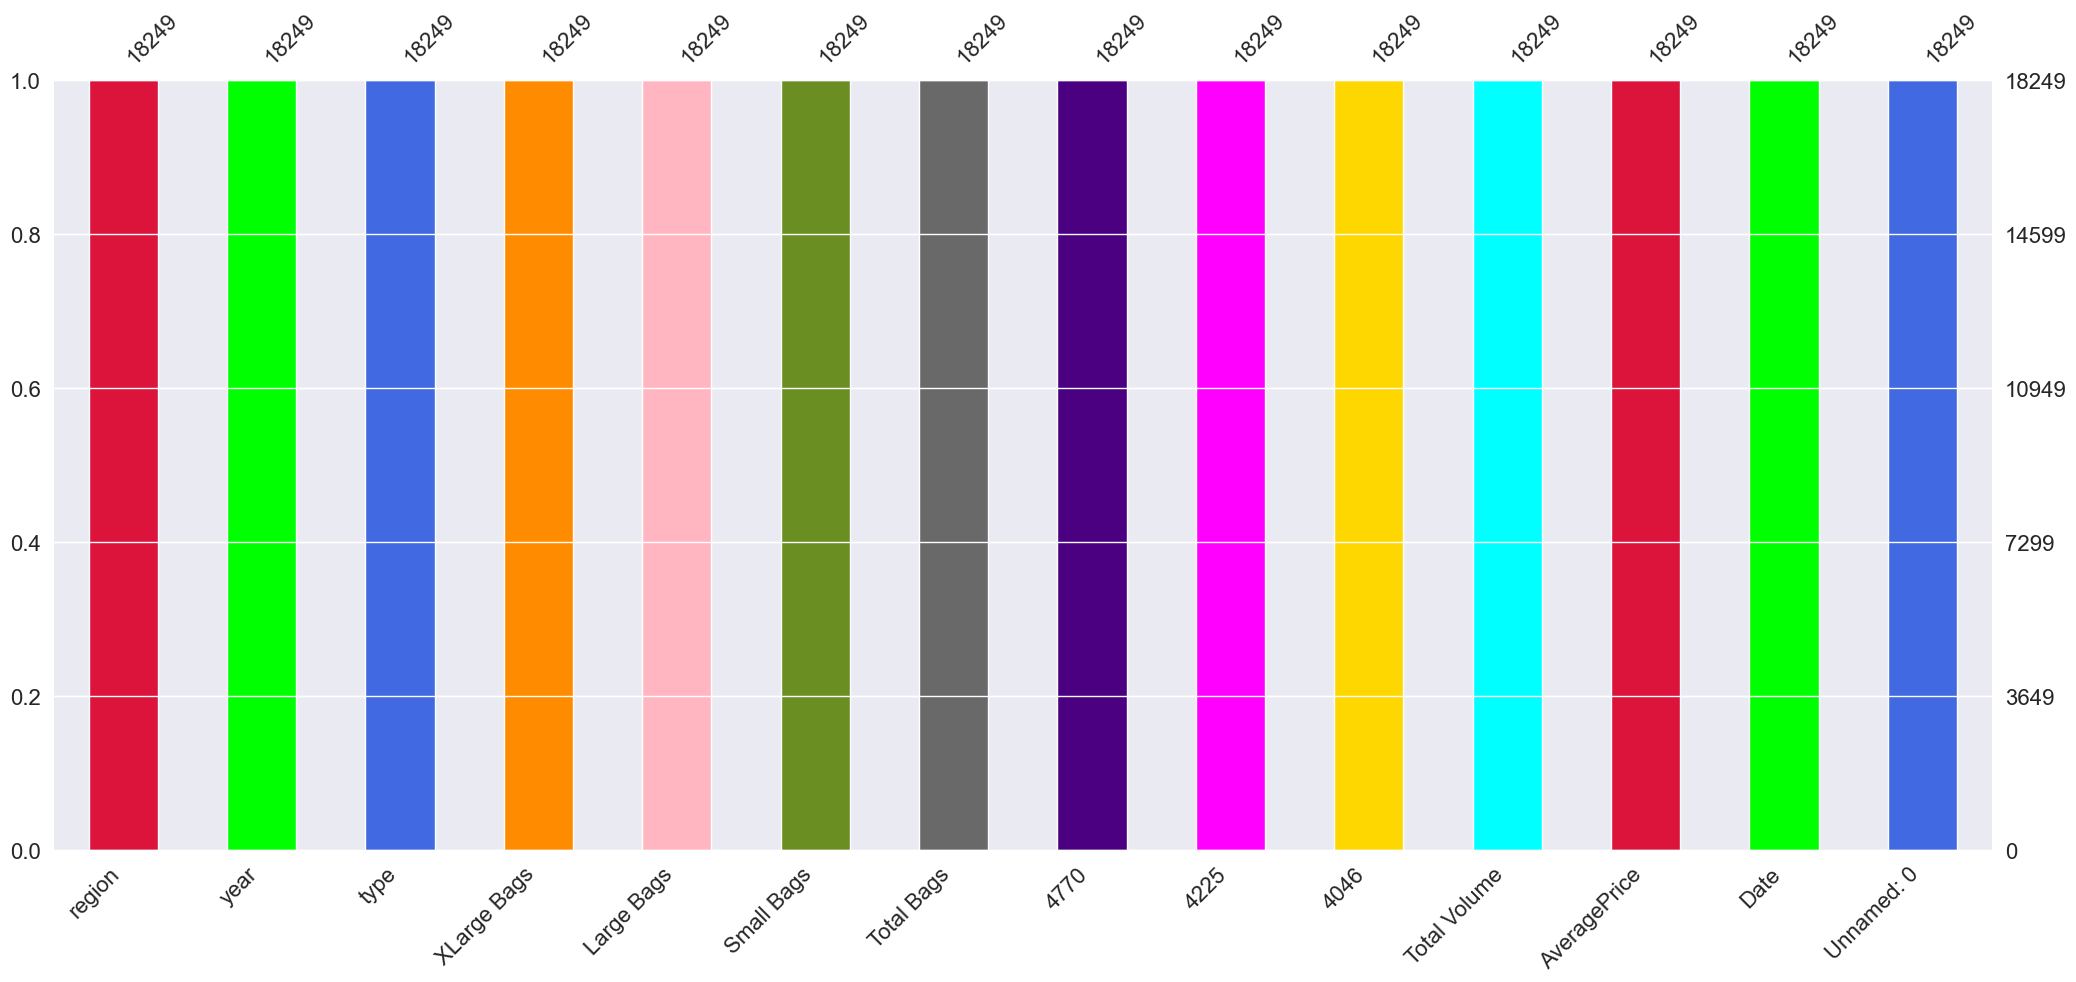

In [46]:
figsize=(10,8)
msno.bar(df, color=['crimson', 'lime', 'royalblue', 'darkorange', 'lightpink', 'olivedrab', 'dimgray', 'indigo', 'magenta', 'gold', 'aqua'], sort='descending')
plt.show()

**After collecting and analyzing the information and visualizations, the following insights come to light:**
    
* Data represents a DataFrame with 14 columns and 18,249 entries.
* RangeIndex spans from 0 to 18,248, indicating row indices.
* Column names and their characteristics are specified, including data types.
* Most columns are of data type float64, int64, or object.
* No missing values (all columns have 18,249 non-null entries).
* The DataFrame consumes approximately 1.9+ MB of memory.

**Data Types**

* Nominal Values (Object Data Type): We have three columns with nominal values, namely 'Date,' 'type,' and 'region.'

* Continuous Values (Float Data Type): Eight columns are represented by continuous values, including 'AveragePrice,' 'Total Volume,' '4046,' '4225,' '4770,' 'Total Bags,' 'Small Bags,' 'Large Bags,' and 'XLarge Bags.'

* Discrete Values (Integer Data Type): Two columns consist of discrete values, specifically 'Unnamed: 0' and 'year.'

**Conclusion for above operations:** This operations are helpful for quickly understanding the structure and content of your DataFrame, especially in the early stages of data analysis. It allows you to check for duplicate values, missing values, verify data types, and get an overview of the DataFrame's memory usage, which can be useful for optimizing memory usage with large datasets.

<div style="background-color: #DADDB1; padding: 10px; text-align: center;">
    <b style="text-align: center;">Summary for Descriptive Statistics</b>
</div>

In [47]:
df.describe().T

count           mean           std      min       25%  \
Unnamed: 0    18249.0      24.232232  1.548104e+01     0.00     10.00   
AveragePrice  18249.0       1.405978  4.026766e-01     0.44      1.10   
Total Volume  18249.0  850644.013009  3.453545e+06    84.56  10838.58   
4046          18249.0  293008.424531  1.264989e+06     0.00    854.07   
4225          18249.0  295154.568356  1.204120e+06     0.00   3008.78   
4770          18249.0   22839.735993  1.074641e+05     0.00      0.00   
Total Bags    18249.0  239639.202060  9.862424e+05     0.00   5088.64   
Small Bags    18249.0  182194.686696  7.461785e+05     0.00   2849.42   
Large Bags    18249.0   54338.088145  2.439660e+05     0.00    127.47   
XLarge Bags   18249.0    3106.426507  1.769289e+04     0.00      0.00   
year          18249.0    2016.147899  9.399385e-01  2015.00   2015.00   

                    50%        75%          max  
Unnamed: 0        24.00      38.00        52.00  
AveragePrice       1.37       1.66         3.25  
Total Volume  107376.76  432962.29  62505646.52  
4046            8645.30  111020.20  22743616.17  
4225           29061.02  150206.86  20470572.61  
4770             184.99    6243.42   2546439.11  
Total Bags     39743.83  110783.37  19373134.37  
Small Bags     26362.82   83337.67  13384586.80  
Large Bags      2647.71   22029.25   5719096.61  
XLarge Bags        0.00     132.50    551693.65  
year            2016.00    2017.00      2018.00

**Unnamed: 0:** 

Skewness: The data is moderately positively skewed, with a mean slightly greater than the median.
Shape: The data distribution is somewhat symmetric, with a mild right-leaning tail.
Spread: The data is relatively dispersed, with values ranging from 0 to 52.
    
**AveragePrice:**

Skewness: The data is positively skewed, as the mean is greater than the median.
Shape: The distribution appears moderately asymmetric, with a right-leaning tail.
Spread: The data ranges from 0.44 to 3.25, with moderate variability.
    
**Total Volume:**

Skewness: The data is significantly positively skewed, with a mean much greater than the median.
Shape: The distribution is highly right-skewed, with a long tail to the right.
Spread: The data shows substantial variability, spanning from 84.56 to 62,505,646.52.
    
**4046:**

Skewness: The data is substantially positively skewed, with the mean much higher than the median.
Shape: The distribution is highly right-skewed, with an extended right tail.
Spread: Data exhibits considerable variability, ranging from 0.00 to 22,743,616.17.
    
**4225:**

Skewness: The data is notably positively skewed, with the mean significantly exceeding the median.
Shape: The distribution is right-skewed, with a pronounced rightward tail.
Spread: The data displays substantial variation, with values spanning from 0.00 to 20,470,572.61.
    
**4770:**

Skewness: The data is highly positively skewed, with a substantial difference between the mean and median.
Shape: The distribution is right-skewed and displays a right-leaning tail.
Spread: Data has a considerable range, from 0.00 to 2,546,439.11.
    
**Total Bags:**

Skewness: The data is substantially positively skewed, with a significant disparity between the mean and median.
Shape: The distribution is right-skewed and exhibits a pronounced rightward tail.
Spread: The data has notable variation, with values spanning from 0.00 to 19,373,134.37.
    
**Small Bags:**

Skewness: The data is highly positively skewed, with a considerable difference between the mean and median.
Shape: The distribution is right-skewed, displaying a right-leaning tail.
Spread: The data shows substantial variability, ranging from 0.00 to 13,384,586.80.
    
**Large Bags:**

Skewness: The data is significantly positively skewed, with a notable disparity between the mean and median.
Shape: The distribution is right-skewed, featuring a pronounced rightward tail.
Spread: The data exhibits considerable variation, with values spanning from 0.00 to 5,719,096.61.
    
**XLarge Bags:**

Skewness: The data is highly positively skewed, with a substantial difference between the mean and median.
Shape: The distribution is right-skewed and has an extended right-leaning tail.
Spread: The data shows notable variability, ranging from 0.00 to 551,693.65.
    
**year:**

Skewness: The data shows minimal skewness, as the mean and median are close.
Shape: The distribution is relatively symmetric with a mild deviation.
Spread: The data spans from 2015 to 2018, demonstrating a small range of values.

**Summary**

* There is considerable variability in every column, except for the Average Price and year columns. 
* The Mean and Median values in all the columns exhibit substantial disparities, except for the Average Price and year columns, indicating a notable presence of skewness in the independent variables. 
* Furthermore, the difference between the minimum and maximum values and the interquartile ranges is uneven, suggesting the potential existence of many outliers in the dataset.

<div style="background-color: #DADDB1; padding: 10px; text-align: center;">
    <b style="text-align: center;">Checking Skewness</b>
</div>

In [48]:
df.skew(numeric_only=True)

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

11it [00:03,  3.49it/s]


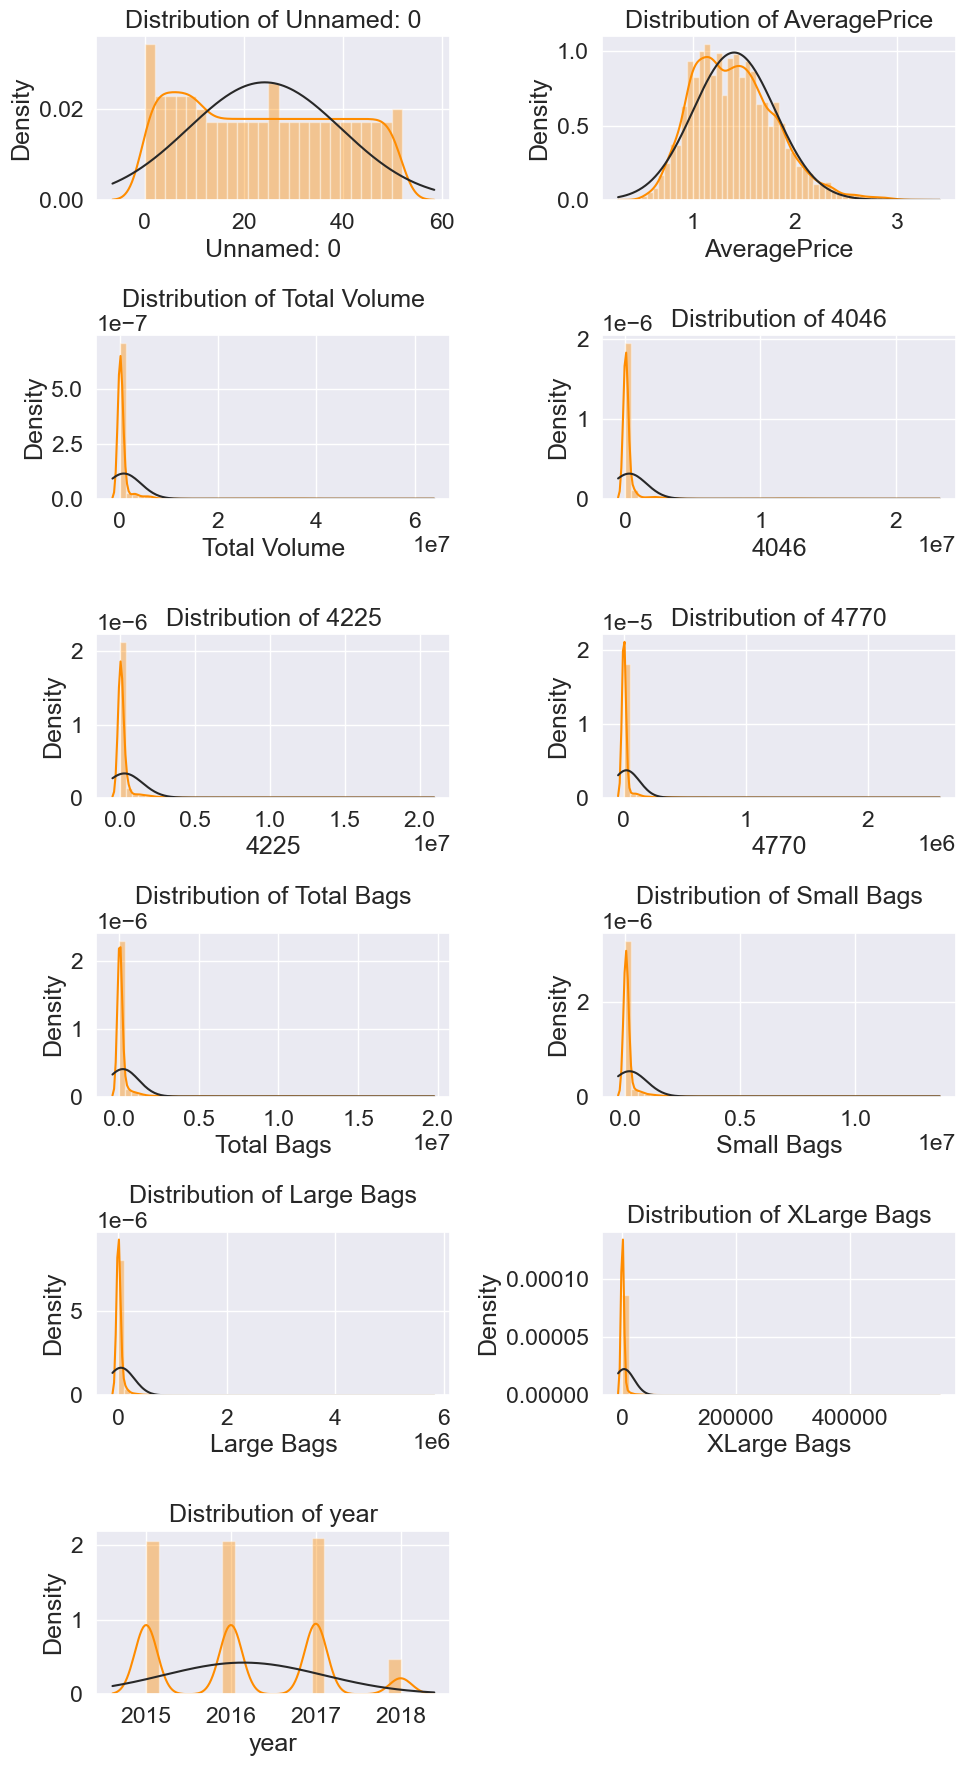

In [49]:
num_cols = len(df.select_dtypes(include=['number']).columns)
sns.set(font_scale=1.5)
# To handle an odd number of columns
num_rows = (num_cols // 2) + (num_cols % 2)

plt.figure(figsize=(10, 18))

# Loop through each numerical column in the DataFrame
for i, col in tqdm(enumerate(df.select_dtypes(include=['number']).columns, 1)):
    
    # Adjust the number of columns based on your preference
    plt.subplot(num_rows, 2, i)
    sns.distplot(df[col], fit=stats.norm, color='darkorange')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

* As previously mentioned, there is skewness evident in all the continuous independent variables, with the exception of the Average Price (which is the label data) and the year (a discrete value). I will tackle this issue in the forthcoming analysis. 

<div style="background-color: #DADDB1; padding: 10px; text-align: center;">
    <b style="text-align: center;">Data Preprocessing</b>
</div>

**The "Unnamed:0" feature merely corresponds to the index values and does not provide any valuable data. As such, it is recommended to eliminate this feature from the dataset.**

In [50]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [51]:
# Categorizes columns based on data types

df.columns.to_series().groupby(df.dtypes).groups

{int64: ['year'], float64: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'], object: ['Date', 'type', 'region']}

* As I have already observed, the Date column is currently in an Object format, which necessitates correction. Let's begin by addressing this issue.

In [52]:
df['Date']= pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['year']=df['Date'].dt.year


* I anm going to convert the date column into a datetime type and proceed to create supplementary columns denoted as "Month," "Year," and "Day."

In [53]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     8696.87     8603.62       93.25          0.0  conventional  2015   
1     9505.56     9408.07       97.49          0.0  conventional  2015   
2     8145.35     8042.21      103.14          0.0  conventional  2015   
3     5811.16     5677.40      133.76          0.0  conventional  2015   
4     6183.95     5986.26      197.69          0.0  conventional  2015   

   region  Month  Day  
0  Albany     12   27  
1  Albany     12   20  
2  Albany     12   13  
3  Albany     12    6  
4  Albany     11   29

* The "Date" column, primarily a timestamp, lacks direct relevance to the analysis goals, thus it can be removed for clarity.
* The date-related information is already captured in the "Month," "Day," and "Year" columns, making the removal of the "Date" column non-disruptive.

In [54]:
df.drop(['Date'],axis=1,inplace=True)

<div style="background-color: #DADDB1; padding: 10px; text-align: center;">
    <b style="text-align: center;">Univariant analysis</b>
</div>

In [55]:
# Checking Unique values of all the columns in our dataframe
for col in df.columns.values:
    print("Number of unique values of  \033[1m{} : {}\033[0m ".format(col,df[col].nunique()))

Number of unique values of  AveragePrice : 259 
Number of unique values of  Total Volume : 18237 
Number of unique values of  4046 : 17702 
Number of unique values of  4225 : 18103 
Number of unique values of  4770 : 12071 
Number of unique values of  Total Bags : 18097 
Number of unique values of  Small Bags : 17321 
Number of unique values of  Large Bags : 15082 
Number of unique values of  XLarge Bags : 5588 
Number of unique values of  type : 2 
Number of unique values of  year : 4 
Number of unique values of  region : 54 
Number of unique values of  Month : 12 
Number of unique values of  Day : 31 


**The "AveragePrice" column exhibits a wide range of 259 unique values, suggesting variability in average prices.**

The "Total Volume" column displays 18,237 unique values, reflecting a broad spectrum of total volumes.

Columns "4046," "4225," and "4770" have 17,702, 18,103, and 12,071 unique values, respectively, showing substantial diversity in the data.

"Total Bags," "Small Bags," and "Large Bags" exhibit diversity with 18,097, 17,321, and 15,082 unique values, respectively.

The "XLarge Bags" column has 5,588 unique values, indicating variability in the XLarge Bags feature.

The "type" column contains 2 unique values, suggesting a binary classification or categorical feature.

The "year" column has 4 unique values, indicating data that spans multiple years.

**The "region" column displays 54 unique values, representing various regions in the dataset.**

The "Month" column has 12 unique values, corresponding to each month of the year.

The "Day" column exhibits 31 unique values, reflecting the days of the month.

In [56]:
for column in df.columns:
    print(f"Column: {column}")
    print("\033[1m" + str(df[column].value_counts()) + "\033[0m", '\n')

Column: AveragePrice
AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64 

Column: Total Volume
Total Volume
4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: count, Length: 18237, dtype: int64 

Column: 4046
4046
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: count, Length: 17702, dtype: int64 

Column: 4225
4225
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: count, Length: 18103, dtype: int64 

Column: 4770
4770
0.00      5497
2.66         7
3.32         7
10.97        6

Minimum 0.44
Maximum 3.25


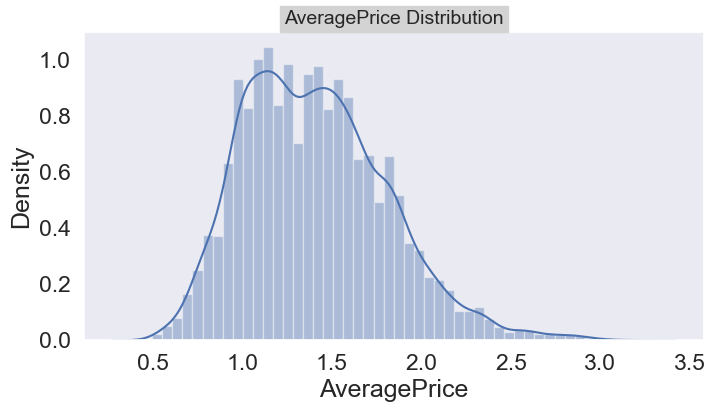

In [57]:
sns.set(font_scale=1.5)
plt.figure(figsize=(8, 4))
sns.distplot(df['AveragePrice'], kde=True)
plt.title('AveragePrice Distribution', backgroundcolor='lightgray', fontsize=14)
print('Minimum',df['AveragePrice'].min())
print('Maximum',df['AveragePrice'].max())
plt.grid(False)  
plt.show()

* The Average Price, which represents the label data, exhibits a slight skew. The price range varies from a minimum of 3.25 to a maximum of 3.25. Notably, the distribution of Average Prices indicates that in the majority of cases, avocado prices fall within the range of 1.1 to 1.4.

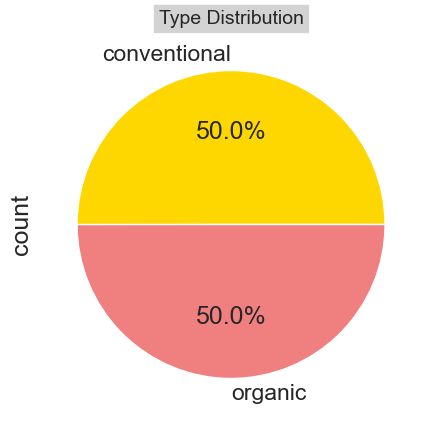

In [58]:
#Visualizing Type Distribution with a Customized Pie Chart
colors = ['gold', 'lightcoral'] 
plt.figure(figsize=(15, 5))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
plt.title('Type Distribution', backgroundcolor='lightgray', fontsize=14)
plt.show()

* The data related to the 'type' variable shows no signs of imbalance.

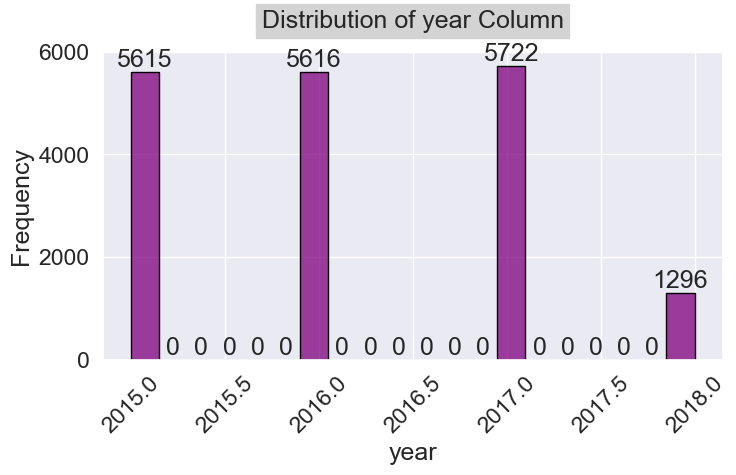

In [59]:
plt.figure(figsize=(8, 4))
ax=sns.histplot(df['year'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of year Column',  backgroundcolor='lightgray', y=1.05)
plt.xlabel('year')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
for i in ax.containers:
    ax.bar_label(i)
plt.show()

* The "year" column contains four distinct values: 2015, 2016, 2017, and 2018. Among these, 2017 stands out as the most frequently occurring year, with a total of 5,722 entries.

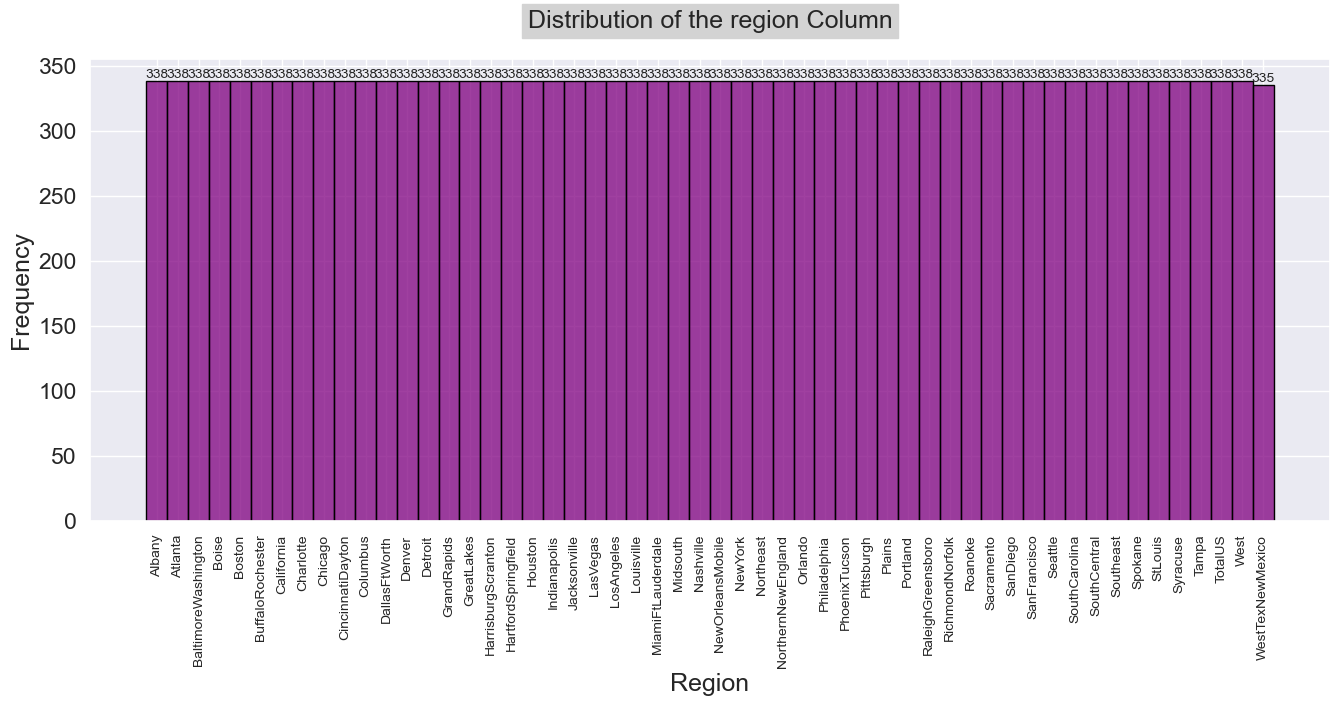

In [60]:
plt.figure(figsize=(16, 6))
ax = sns.histplot(df['region'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of the region Column', backgroundcolor='lightgray', y=1.05)
plt.xlabel('Region')
plt.ylabel('Frequency')

# Rotate x-axis labels at the bottom
plt.xticks(rotation=90)
plt.xticks(fontsize=10)

# Add bar labels at the top
for rect in ax.patches:
    ax.annotate(f'{int(rect.get_height())}', (rect.get_x() + rect.get_width() / 2, rect.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()

* The "region" column contains 54 distinct regions. Most of these regions occur 338 times, with the exception of "WestTexNewMexico," which has a count of 335.

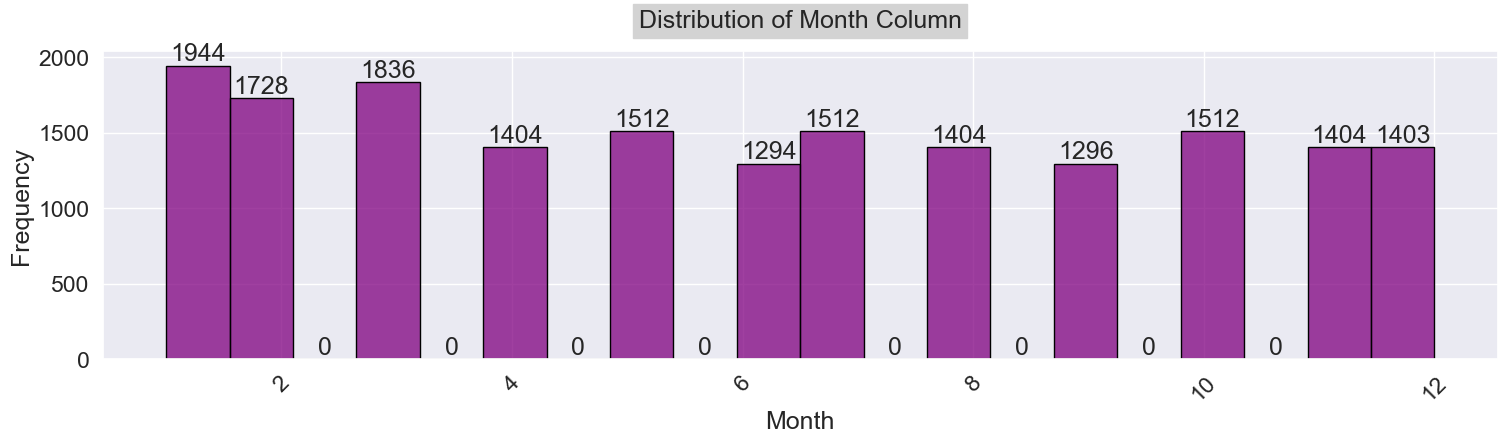

In [61]:
plt.figure(figsize=(18, 4))
ax=sns.histplot(df['Month'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Month Column',  backgroundcolor='lightgray', y=1.05)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
for i in ax.containers:
    ax.bar_label(i)
plt.show()

* The "month" column exhibits 12 distinct values, corresponding to the months of the year. The first month of year stands out as the most frequent, occurring 1,944 times

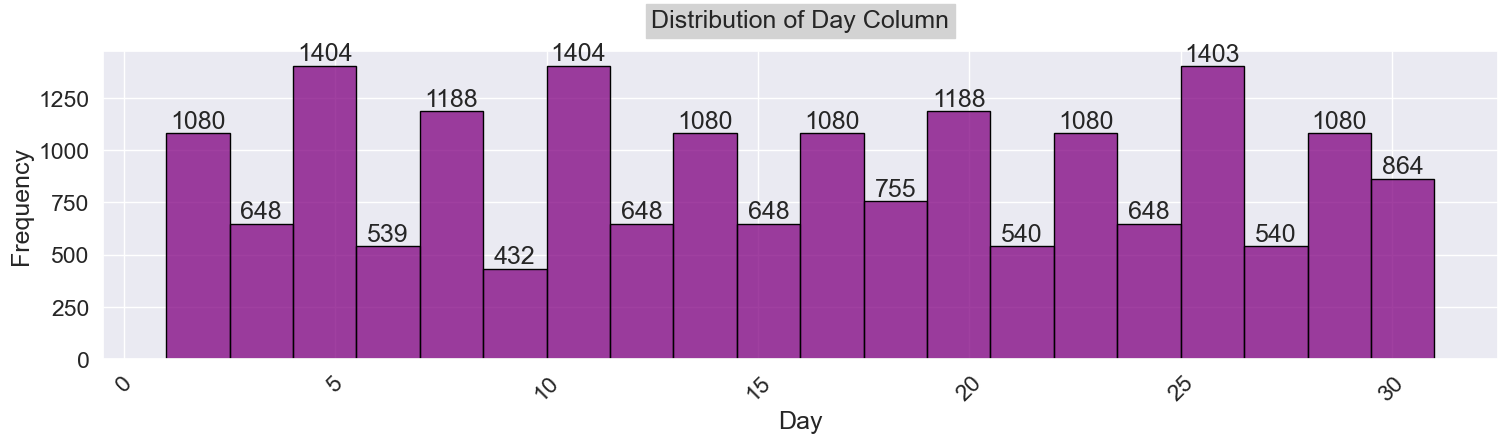

In [62]:
plt.figure(figsize=(18, 4))
ax=sns.histplot(df['Day'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Day Column',  backgroundcolor='lightgray', y=1.05)
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
for i in ax.containers:
    ax.bar_label(i)
plt.show()


Based on the graphs, it's evident that the graphical univariate analysis of various columns has effectively revealed their skewness. The visual representation of skewness is readily apparent in the "Checking Skewness" section. Now, it's time to explore bivariate analysis to gain further insights into the interactions and behaviors of these columns.

<div style="background-color: #DADDB1; padding: 10px; text-align: center;">
    <b style="text-align: center;">Bivariant analysis</b>
</div>

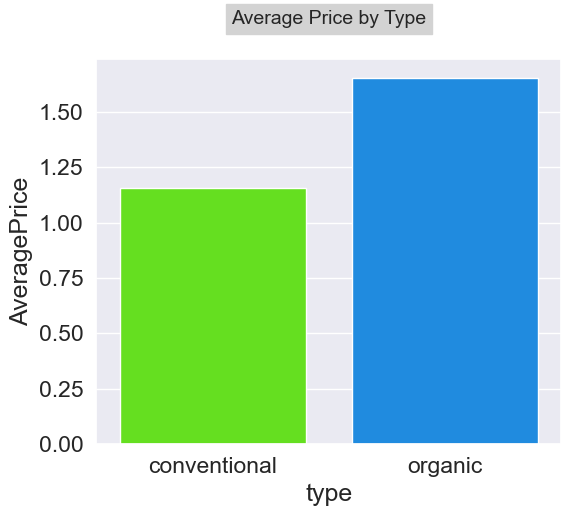

In [63]:
plt.figure(figsize=(6, 5))
sns.barplot(x='type', y='AveragePrice', data=df, palette='gist_rainbow', errorbar=None)
plt.title('Average Price by Type', fontsize=14, backgroundcolor='lightgray', y=1.07)
plt.show()

* It is evident that organic products come at a higher price point compared to conventional products. It's a well-known fact that organic items tend to command a premium price due to their cultivation without the use of synthetic fertilizers.

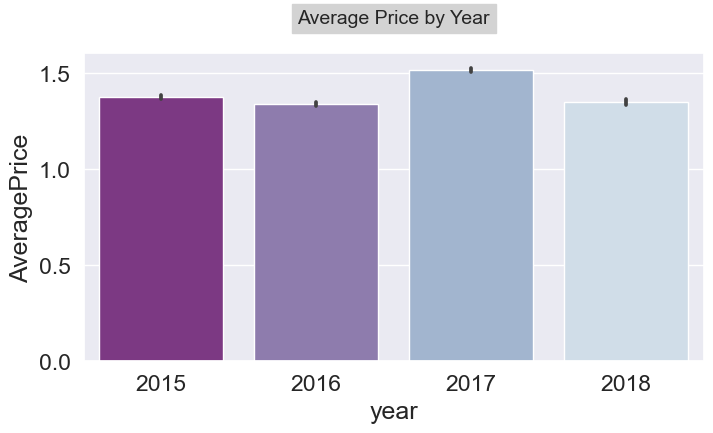

In [64]:
plt.figure(figsize=(8,4))
sns.barplot(x='year',y='AveragePrice',data=df,palette='BuPu_r')
plt.title('Average Price by Year', fontsize=14, backgroundcolor='lightgray', y=1.07)
plt.show()

* The highest avocado prices were recorded in 2017, while in 2015, 2016, and 2018, the prices remained relatively consistent.

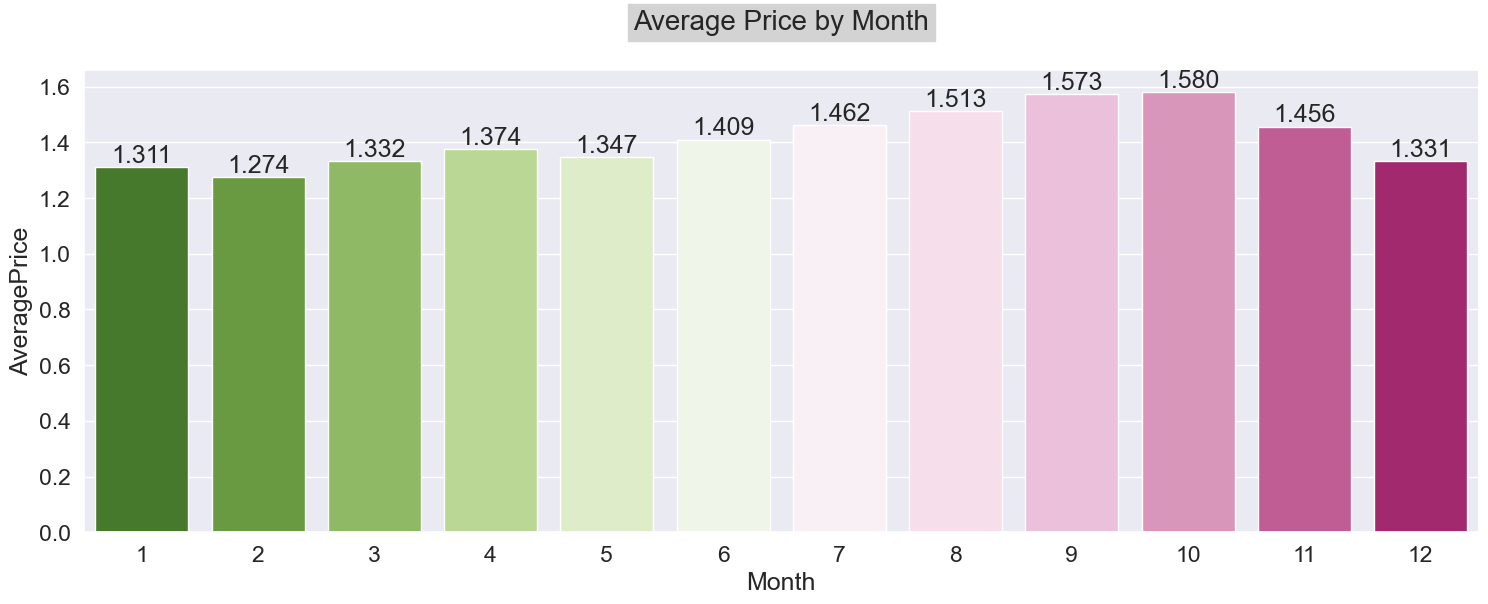

In [65]:
plt.figure(figsize=(18, 6))
ax = sns.barplot(x='Month', y='AveragePrice', data=df, palette='PiYG_r', ci=None)  # Changed "errorbar" to "ci"
plt.title('Average Price by Month', fontsize=20, backgroundcolor='lightgray', y=1.07)
for i in ax.containers:
    ax.bar_label(i, fmt='%.3f')  # Corrected the syntax
plt.show()

* This plot indicates a notable trend: starting from June at 6th position, the price consistently rose until Novemberat 11th position in grapgh.

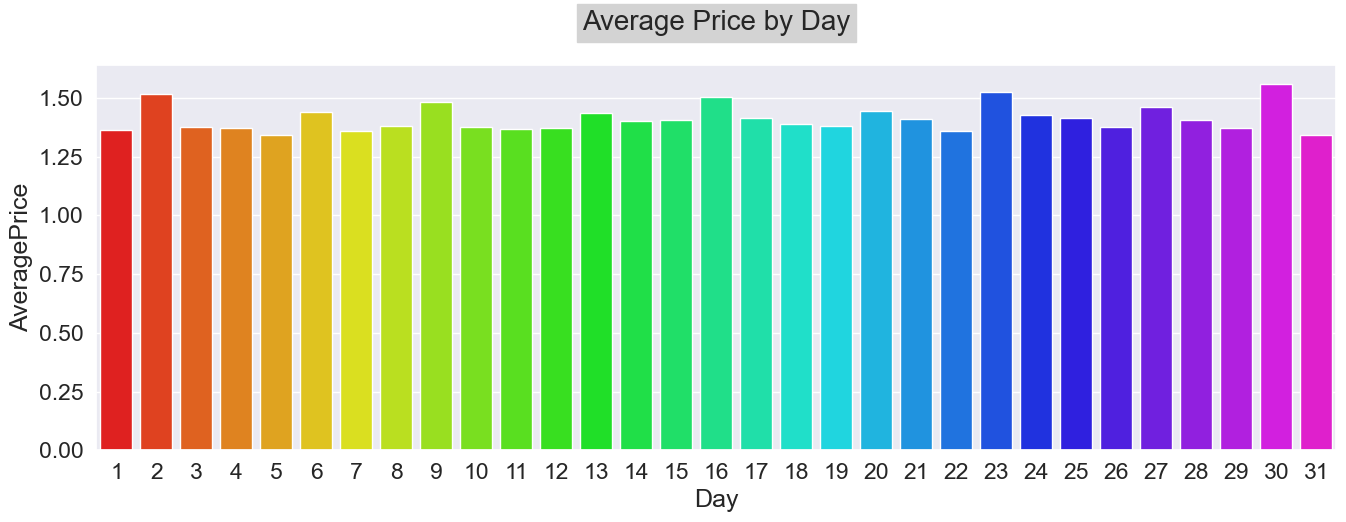

In [66]:
plt.figure(figsize=(16, 5))
sns.barplot(x='Day', y='AveragePrice', data=df, palette='gist_rainbow', errorbar=None)
plt.title('Average Price by Day', fontsize=20, backgroundcolor='lightgray', y=1.07)

plt.show()

* It is noticeable that the average price tends to peak on the 2nd, 9th, 16th, 23rd, and 30th days of the month.  The variability in average prices becomes apparent when studying the correlation between average price and the day of the month.

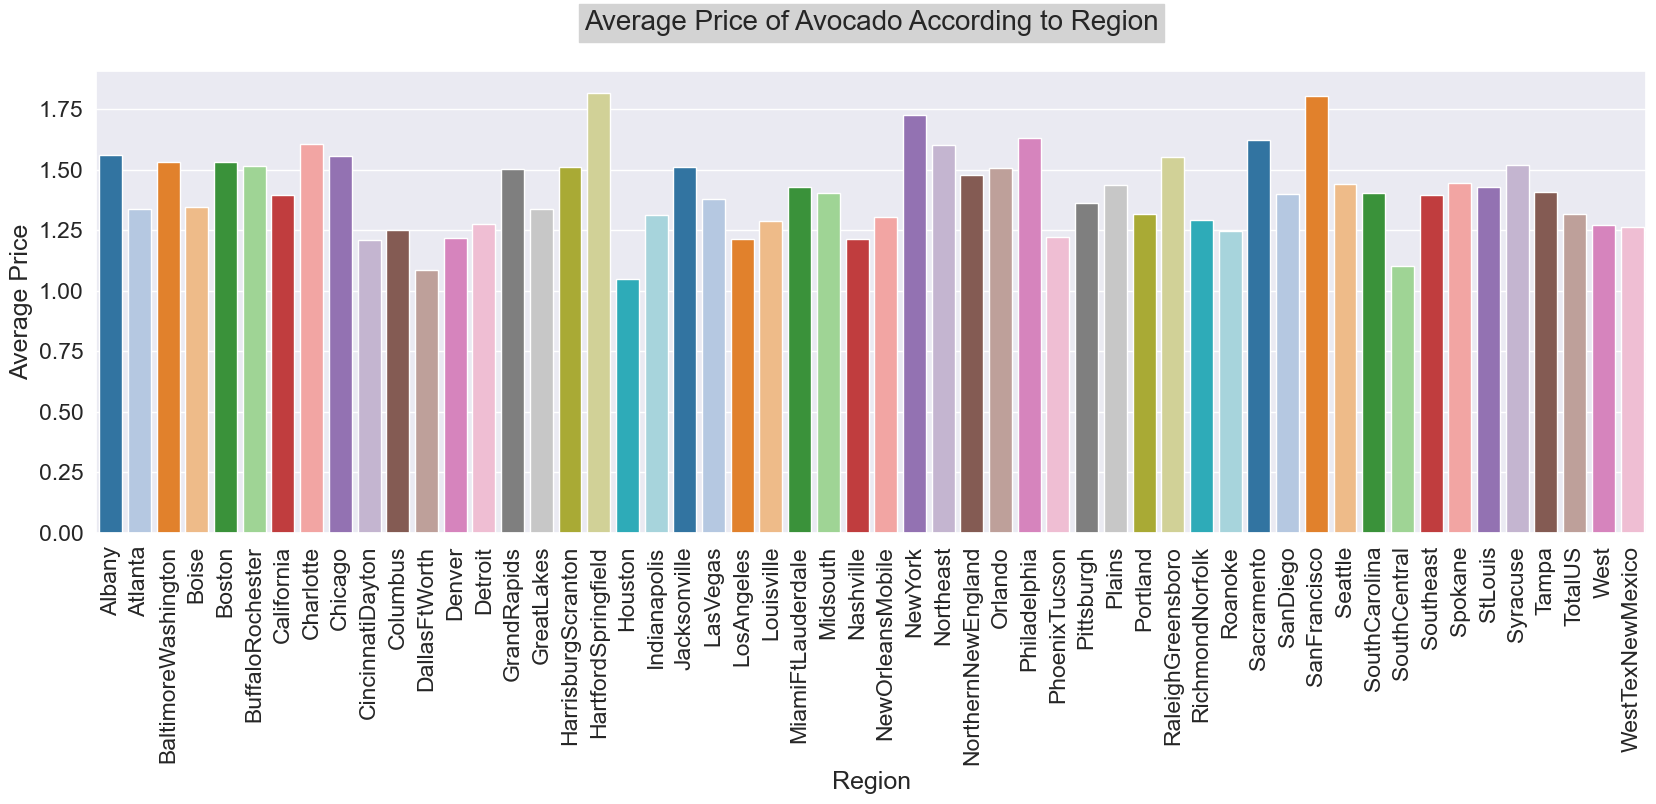

In [67]:
plt.figure(figsize=(20,6))
sns.barplot(x='region',y='AveragePrice',data=df,palette='tab20', errorbar=None)
#plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region', fontsize=20, backgroundcolor='lightgray', y=1.07)
plt.xticks(rotation=90)
plt.show()

* The highest average prices for avocados were observed in the San Diego, Las Vegas, and Charlotte regions, while the lowest prices were found in Phoenix Tucson. It's worth mentioning that the areas with the highest average prices are generally associated with more significant development.

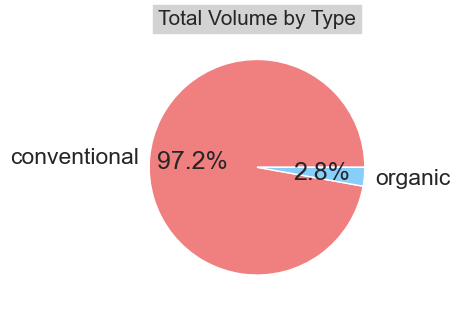

In [68]:
plt.figure(figsize=(3.5,3.5))
Type = df.groupby('type')['Total Volume'].agg('sum')
labels = ['conventional', 'organic']
sizes = [Type['conventional'], Type['organic']]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
#plt.axis('equal')  
plt.title('Total Volume by Type',  backgroundcolor='lightgray', fontsize=15)
plt.show()

* Only 2.8% of our dataset represents the organic category, underscoring the common preference for conventional products.

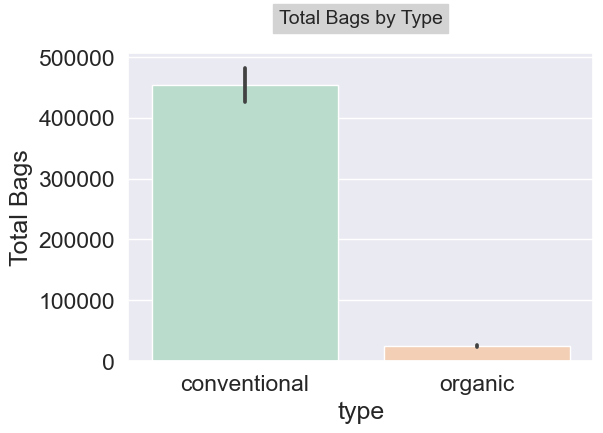

In [69]:
plt.figure(figsize=(6, 4))
sns.barplot(x='type', y='Total Bags', data=df, palette='Pastel2')
plt.title('Total Bags by Type', fontsize=14, backgroundcolor='lightgray', y=1.07)
plt.show()

* It is clear that people tend to prefer conventional avocados over organic ones. This preference is likely influenced by the higher cost and limited availability of organic products.

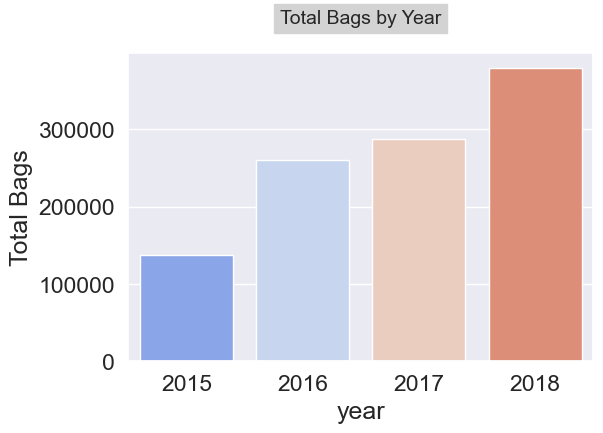

In [70]:
plt.figure(figsize=(6, 4))
sns.barplot(x='year', y='Total Bags', data=df, palette='coolwarm', errorbar=None)  
plt.title('Total Bags by Year', fontsize=14, backgroundcolor='lightgray', y=1.07)
plt.show()

* The year 2018 saw the highest total number of bags sold. Over the period from 2015 to 2018, there is a noticeable upward trend in the total bags sold, indicating positive growth.

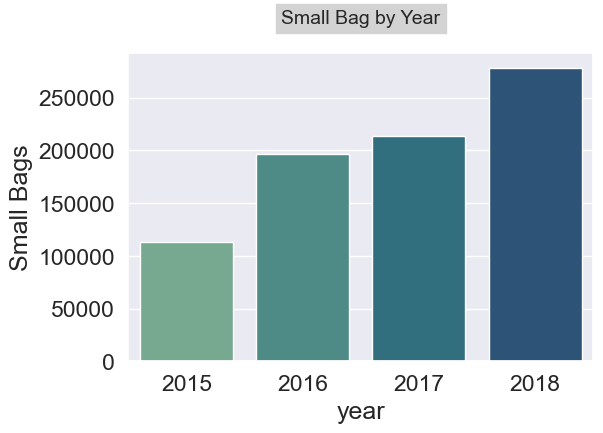

In [71]:
plt.figure(figsize=(6, 4))
sns.barplot(x='year', y='Small Bags', data=df, palette='crest', errorbar=None)  
plt.title('Small Bag by Year', fontsize=14, backgroundcolor='lightgray', y=1.07)
plt.show()

* In 2018, the highest total number of bags were sold. Over the span of 2015 to 2018, we observe a consistent upward trend in the sales of small bags, reflecting positive growth.

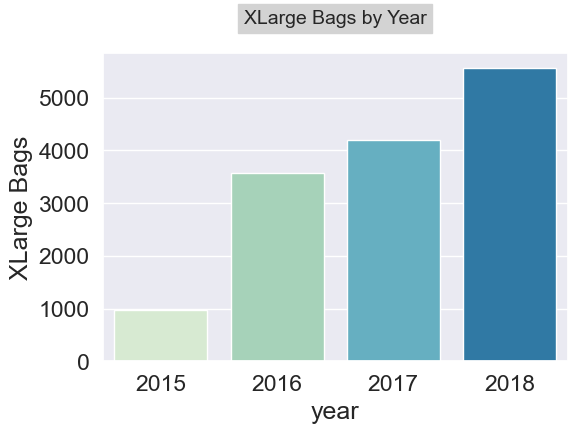

In [72]:
plt.figure(figsize=(6, 4))
sns.barplot(x='year', y='XLarge Bags', data=df, palette='GnBu', errorbar=None)  
plt.title('XLarge Bags by Year', fontsize=14, backgroundcolor='lightgray', y=1.07)
plt.show()

* In 2018, the highest total number of bags were sold. Over the span of 2015 to 2018, we observe a consistent upward trend in the sales of XLarge bags, reflecting positive growth.

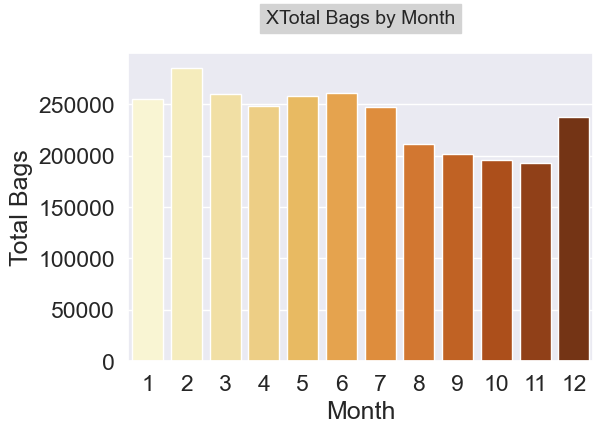

In [73]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Month', y='Total Bags', data=df, palette='YlOrBr', errorbar=None)  
plt.title('XTotal Bags by Month', fontsize=14, backgroundcolor='lightgray', y=1.07)
plt.show()

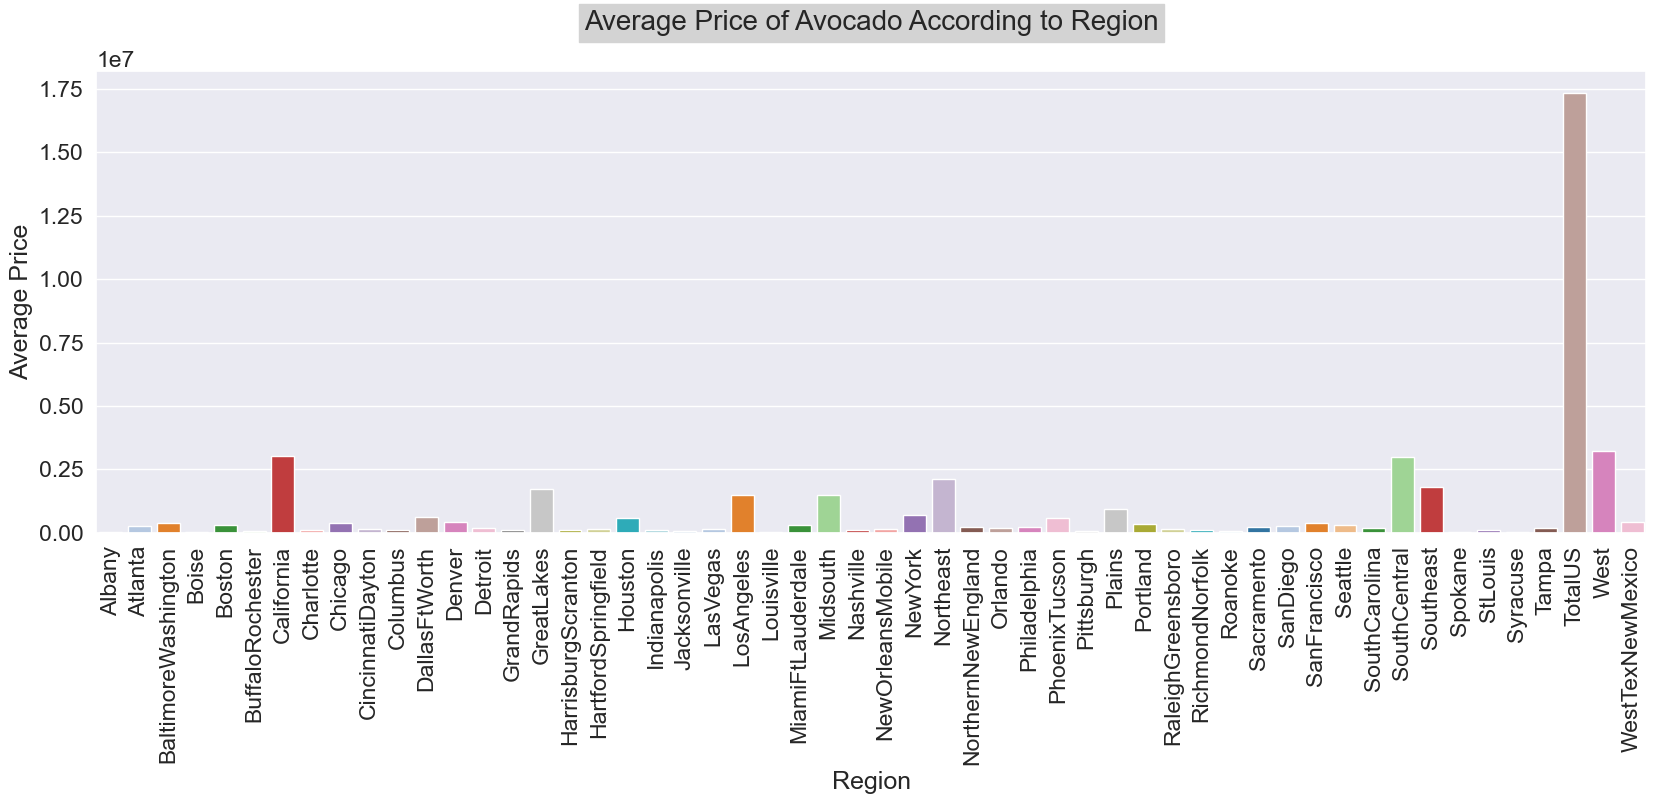

In [74]:
plt.figure(figsize=(20,6))
sns.barplot(x='region',y='Total Volume',data=df,palette='tab20', errorbar=None)
#plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region', fontsize=20, backgroundcolor='lightgray', y=1.07)
plt.xticks(rotation=90)
plt.show()

* Including the "TotalUS" region, the highest consumption is evident in regions such as California, South Central, Southeast, West, Northeast, and Great Lakes.

<div style="background-color: #DADDB1; padding: 10px; text-align: center;">
    <b style="text-align: center;">Multivariant analysis</b>
</div>

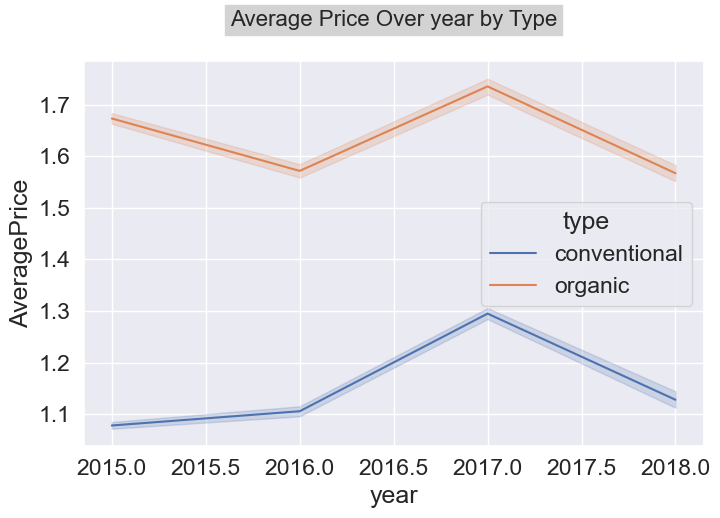

In [75]:
plt.figure(figsize=(8, 5))
sns.lineplot(x="year", y="AveragePrice", hue='type', data=df)
plt.title('Average Price Over year by Type', backgroundcolor='lightgray', fontsize=16, y=1.07)
plt.show()

* From 2016 to 2017, there is a noticeable positive sales growth in both conventional and organic avocados. In 2017, both types peak in sales. However, it's worth noting that conventional avocados exhibit steady growth from 2015 to 2016 as well, indicating stronger growth compared to organic avocados. In the graph, the orange line represents organic avocados, and it's evident that their prices are higher than those of conventional avocados

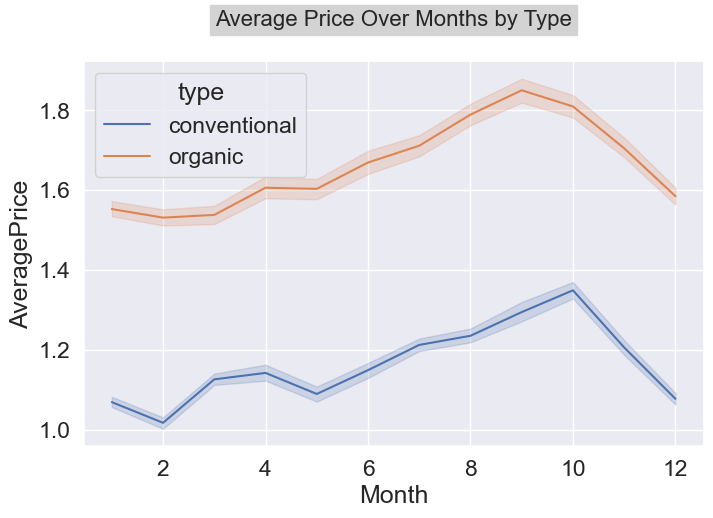

In [76]:
plt.figure(figsize=(8, 5))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.title('Average Price Over Months by Type', backgroundcolor='lightgray', fontsize=16, y=1.07)
plt.show()

* It appears that there was a notable price increase between months 8 and 10 for both Conventional and Organic types of avocados.


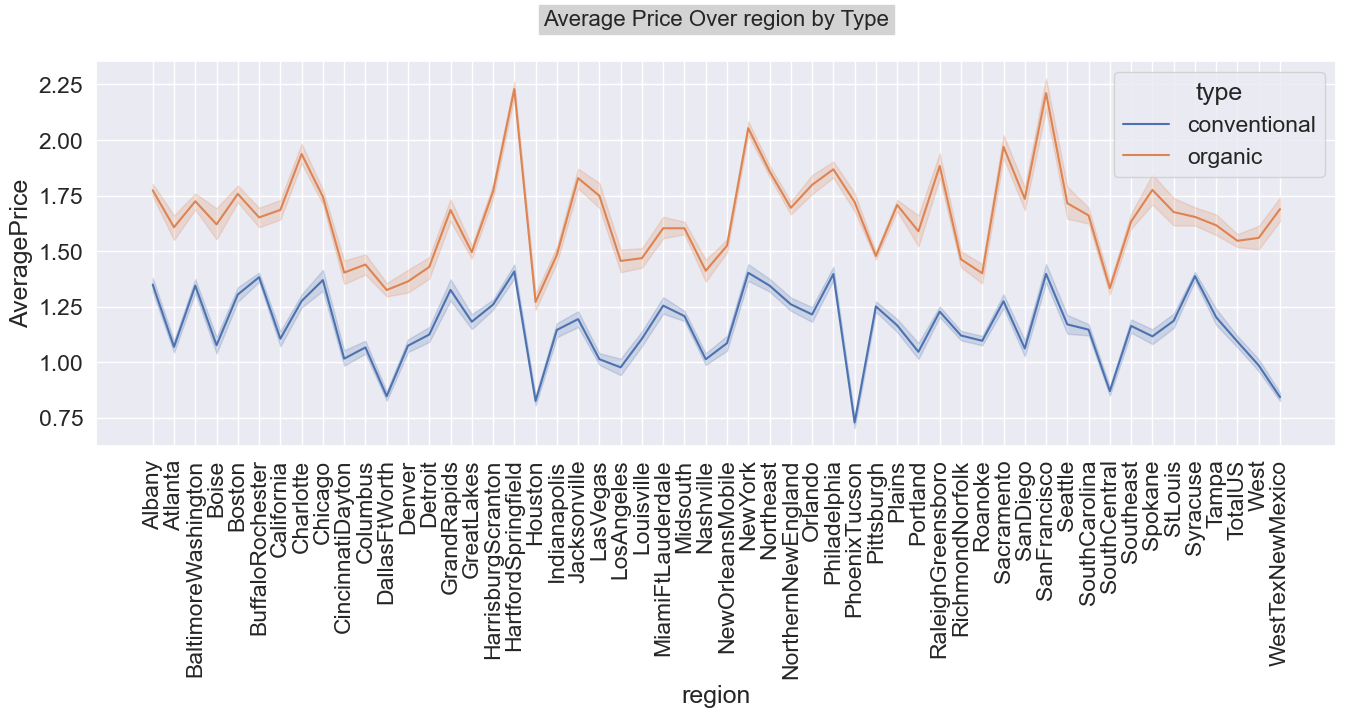

In [77]:
plt.figure(figsize=(16, 5))
sns.lineplot(x="region", y="AveragePrice", hue='type', data=df)
plt.title('Average Price Over region by Type', backgroundcolor='lightgray', fontsize=16, y=1.07)
plt.xticks(rotation=90)
plt.show()

* These regions, which are shared by both conventional and organic avocados, feature the highest avocado prices. The common regions include Harrisburg-Scranton, Hartford-Springfield, San Francisco, New York, Philadelphia, and Sacramento.

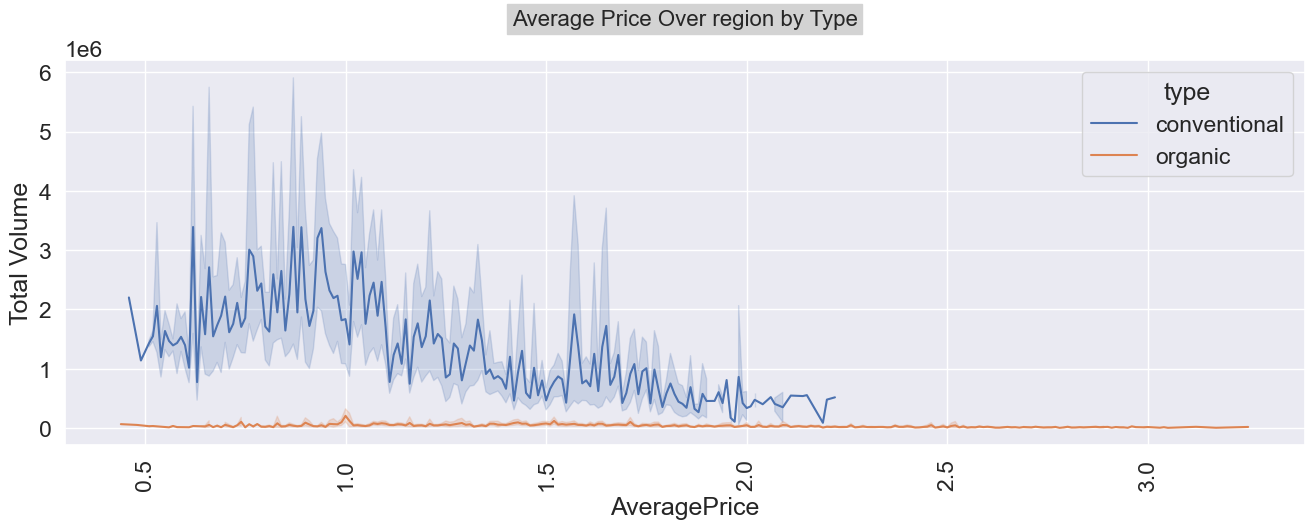

In [78]:
plt.figure(figsize=(16, 5))
sns.lineplot(x="AveragePrice", y="Total Volume", hue='type', data=df)
plt.title('Average Price Over region by Type', backgroundcolor='lightgray', fontsize=16, y=1.07)
plt.xticks(rotation=90)
plt.show()

* Conventional avocados have a higher total volume compared to organic ones, yet the price of conventional avocados is lower in comparison to organic avocados.

**The correlation between "Total Bags" and the different bag categories, specifically "Small Bags," "Large Bags," and "XLarge Bags.**

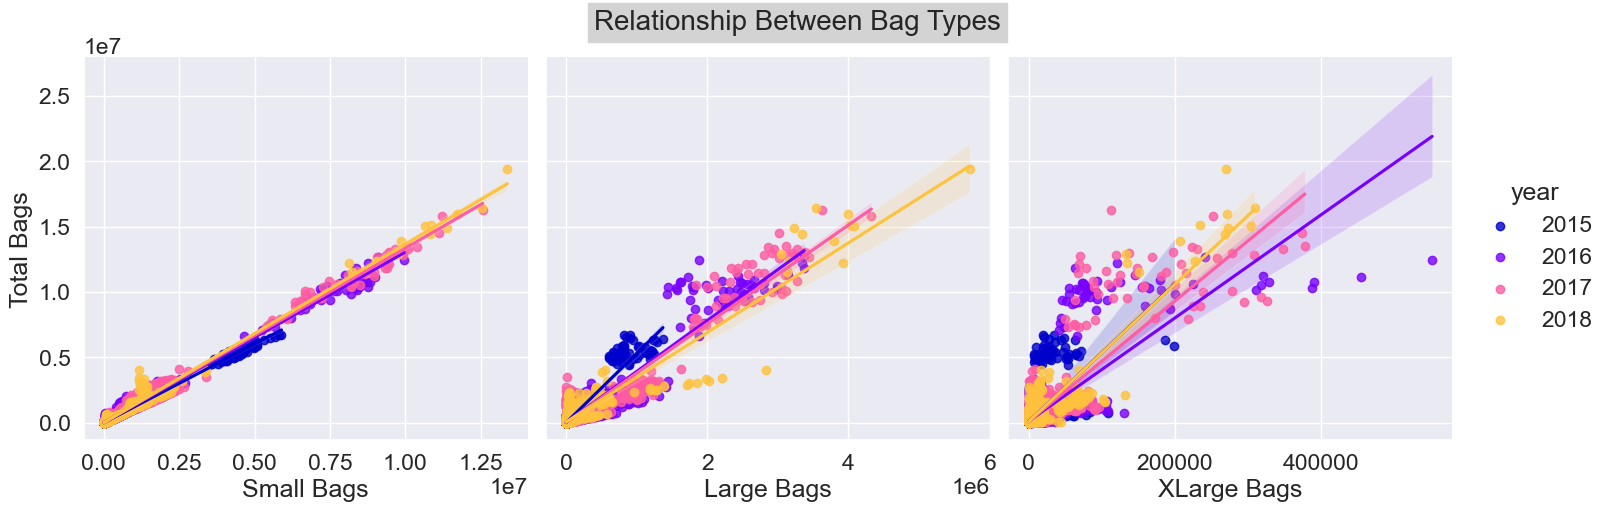

In [79]:
g = sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=5, aspect=1, kind='reg', hue='year', palette='gnuplot2')

g.fig.suptitle('Relationship Between Bag Types', backgroundcolor='lightgray', fontsize=20, y=1.02)

plt.show()

* In the year 2016, there is a strong correlation between "Total Volume" and all types of bags, including 'Small Bags,' 'Large Bags,' and 'XLarge Bags.' Among these, 'Small Bags' exhibit a stronger correlation compared to the others.

* For the year 2015, there is a strong correlation between "Total Volume" and 'Small Bags' and 'Large Bags,' while the correlation with 'XLarge Bags' is weaker.

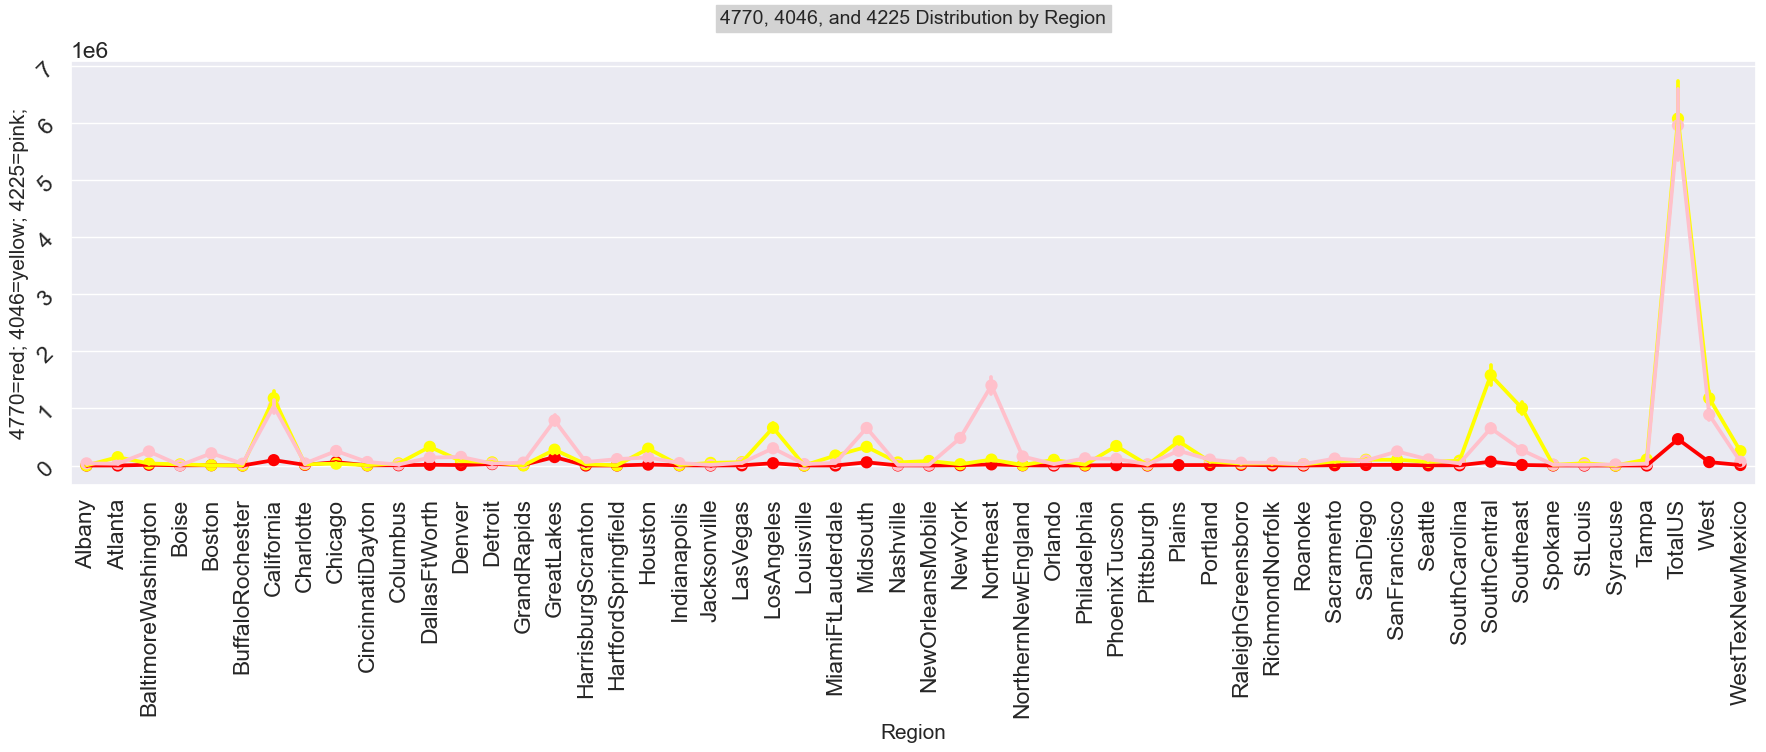

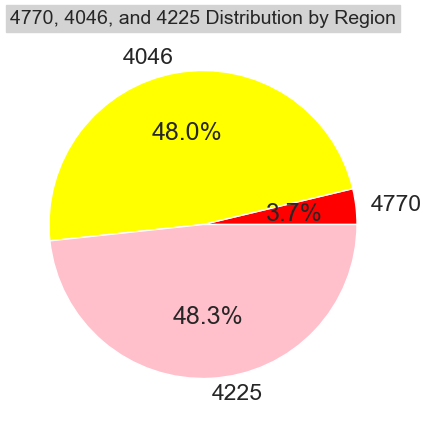

In [80]:
s = ['4770', '4046', '4225']

plt.figure(figsize=(18, 8))
for var, color in zip(s, ['red', 'yellow', 'pink']):
    sns.pointplot(y=var, x='region', data=df, color=color)

plt.xlabel('Region', fontsize=15)
plt.ylabel('4770=red; 4046=yellow; 4225=pink;', fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plt.title('4770, 4046, and 4225 Distribution by Region', backgroundcolor='lightgray', fontsize=14, y=1.07)
plt.tight_layout()

plt.figure(figsize=(5, 5))
data = df[s].sum()
labels = s
colors = ['red', 'yellow', 'pink']
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('4770, 4046, and 4225 Distribution by Region', backgroundcolor='lightgray', fontsize=14)
plt.show()

* The TotalUS region has the highest consumption of avocados with PLU codes 4046 and 4225.

<div style="background-color: #DADDB1; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Analyzing the dataset's categorical and numerical columns</b>
</div>

In [81]:
# Checking for categorical columns
categorical_cols = [i for i in df.dtypes.index if df.dtypes[i] == "object"]
print("\033[1mLength of Categorical Columns:\033[0m",len(categorical_cols),"\033[1mCategorical Columns:\033[0m", categorical_cols)
print("\n")

# Checking for numerical columns
numerical_cols = [i for i in df.dtypes.index if df.dtypes[i] != "object"]
print("\033[1mLength of Numercal Columns:\033[0m",len(numerical_cols), "\033[1mNumerical Columns:\033[0m ", numerical_cols)

Length of Categorical Columns: 2 Categorical Columns: ['type', 'region']


Length of Numercal Columns: 12 Numerical Columns:  ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


<div style="background-color: #DADDB1; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Encoding categorical Data</b>
</div>

In [82]:
le = LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0     8603.62       93.25          0.0     0  2015       0     12   27  
1     9408.07       97.49          0.0     0  2015       0     12   20  
2     8042.21      103.14          0.0     0  2015       0     12   13  
3     5677.40      133.76          0.0     0  2015       0     12    6  
4     5986.26      197.69          0.0     0  2015       0     11   29

<div style="background-color: #DADDB1; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Correlation</b>
</div>

In [83]:
df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.192752 -0.208317 -0.172928 -0.179446   
Total Volume     -0.192752      1.000000  0.977863  0.974181  0.872202   
4046             -0.208317      0.977863  1.000000  0.926110  0.833389   
4225             -0.172928      0.974181  0.926110  1.000000  0.887855   
4770             -0.179446      0.872202  0.833389  0.887855  1.000000   
Total Bags       -0.177088      0.963047  0.920057  0.905787  0.792314   
Small Bags       -0.174730      0.967238  0.925280  0.916031  0.802733   
Large Bags       -0.172940      0.880640  0.838645  0.810015  0.698471   
XLarge Bags      -0.117592      0.747157  0.699377  0.688809  0.679861   
type              0.615845     -0.232434 -0.225819 -0.232289 -0.210027   
year              0.093197      0.017193  0.003353 -0.009559 -0.036531   
region           -0.011716      0.174176  0.192073  0.145726  0.095252   
Month             0.162409     -0.024689 -0.025803 -0.022108 -0.033424   
Day               0.027386     -0.009747 -0.010159 -0.012393 -0.009009   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.177088   -0.174730   -0.172940    -0.117592  0.615845   
Total Volume    0.963047    0.967238    0.880640     0.747157 -0.232434   
4046            0.920057    0.925280    0.838645     0.699377 -0.225819   
4225            0.905787    0.916031    0.810015     0.688809 -0.232289   
4770            0.792314    0.802733    0.698471     0.679861 -0.210027   
Total Bags      1.000000    0.994335    0.943009     0.804233 -0.217788   
Small Bags      0.994335    1.000000    0.902589     0.806845 -0.220535   
Large Bags      0.943009    0.902589    1.000000     0.710858 -0.193177   
XLarge Bags     0.804233    0.806845    0.710858     1.000000 -0.175483   
type           -0.217788   -0.220535   -0.193177    -0.175483  1.000000   
year            0.071552    0.063915    0.087891     0.081033 -0.000032   
region          0.175256    0.164702    0.198768     0.082281 -0.000280   
Month          -0.022724   -0.023126   -0.020187    -0.012969 -0.000085   
Day            -0.004988   -0.003870   -0.008352     0.000319 -0.000013   

                  year    region     Month       Day  
AveragePrice  0.093197 -0.011716  0.162409  0.027386  
Total Volume  0.017193  0.174176 -0.024689 -0.009747  
4046          0.003353  0.192073 -0.025803 -0.010159  
4225         -0.009559  0.145726 -0.022108 -0.012393  
4770         -0.036531  0.095252 -0.033424 -0.009009  
Total Bags    0.071552  0.175256 -0.022724 -0.004988  
Small Bags    0.063915  0.164702 -0.023126 -0.003870  
Large Bags    0.087891  0.198768 -0.020187 -0.008352  
XLarge Bags   0.081033  0.082281 -0.012969  0.000319  
type         -0.000032 -0.000280 -0.000085 -0.000013  
year          1.000000 -0.000055 -0.177050  0.004475  
region       -0.000055  1.000000 -0.000144 -0.000021  
Month        -0.177050 -0.000144  1.000000  0.010621  
Day           0.004475 -0.000021  0.010621  1.000000

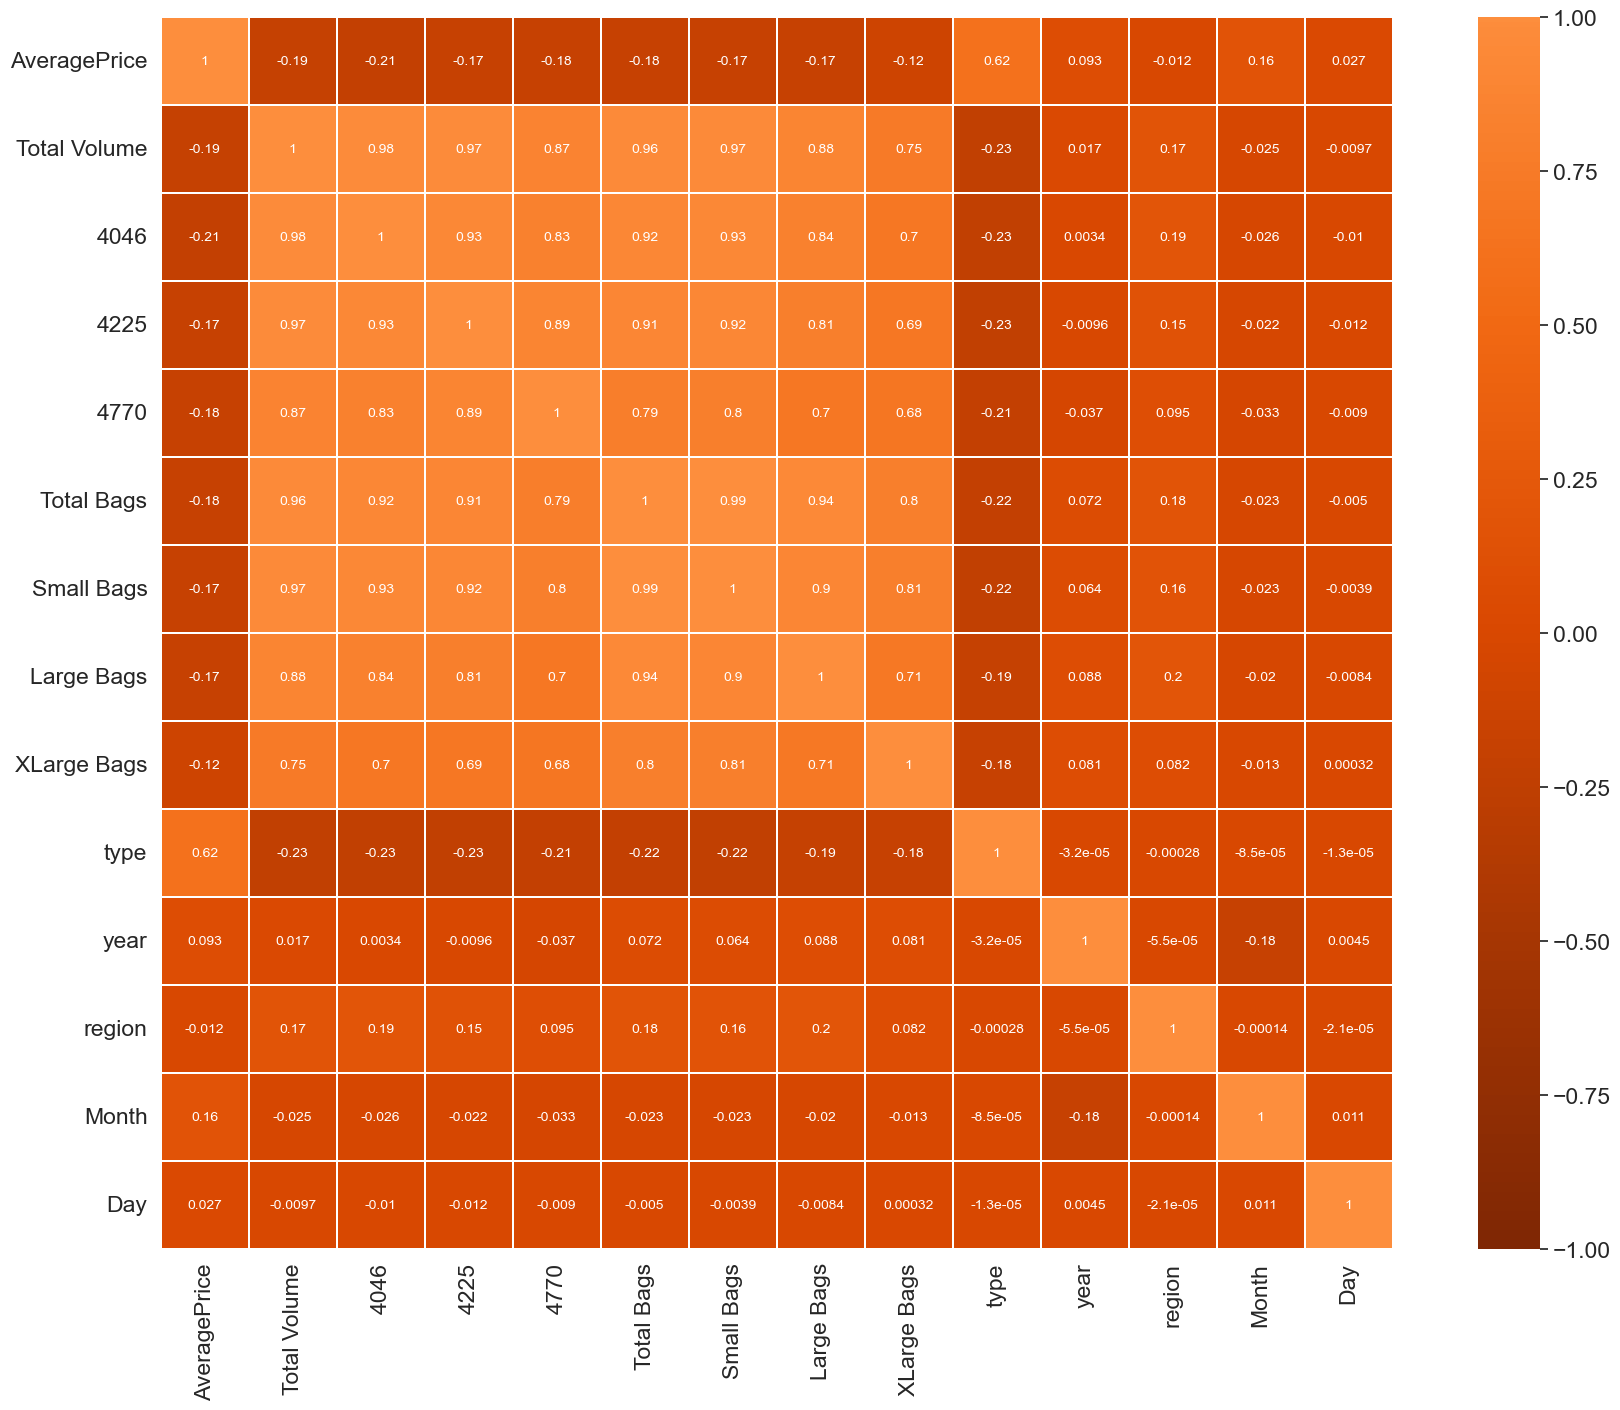

In [84]:
plt.figure(figsize=(22, 16))
sns.heatmap(df.corr(), cbar=True, cmap='Oranges_r', vmin=-1, vmax=1, square=True, fmt='.2g', annot=True,
            center=True, annot_kws={'size': 10}, linewidths=0.1, linecolor='white')
plt.show()

**Positive Strong Correlation:** 

* "AveragePrice" and "type" have a positive strong correlation of 0.615845.
* "Total Bags" and "Small Bags" exhibit a positive strong correlation of 0.994335.

**Positive Moderate Correlation:**

*"Total Volume" and "4770," "4046," "4225," and "Total Bags" all have positive moderate correlations.

**Negative Moderate Correlation:**

* "type" and "XLarge Bags" demonstrate a negative moderate correlation of -0.175483.
* "Year" and "region" exhibit a negative moderate correlation of -0.177050.

**Negative Correlation:**

* "AveragePrice" and "year" have a negative correlation of 0.093197.

**No Correlation:**

*"Day" and "type" have no correlation with a value close to zero.

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
region         -0.011716
Day             0.027386
year            0.093197
Month           0.162409
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64


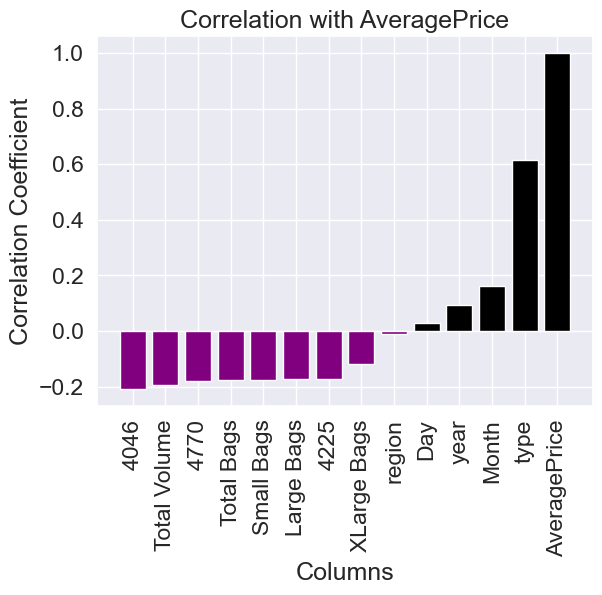

In [85]:
corr=df.corr()['AveragePrice'].sort_values()
print(corr)
colors = ['purple' if c < 0 else 'black' for c in corr]

plt.bar(corr.index, corr, color=colors)
plt.title('Correlation with AveragePrice')
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()

* Columns like "4046," "Total Volume," "4770," "Total Bags," "Small Bags," "Large Bags," "4225," and "XLarge Bags" exhibit negative correlations. Several columns demonstrate negative correlations with the target variable.

<div style="background-color: #DADDB1; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Identifying and Managing Outliers</b>
</div>

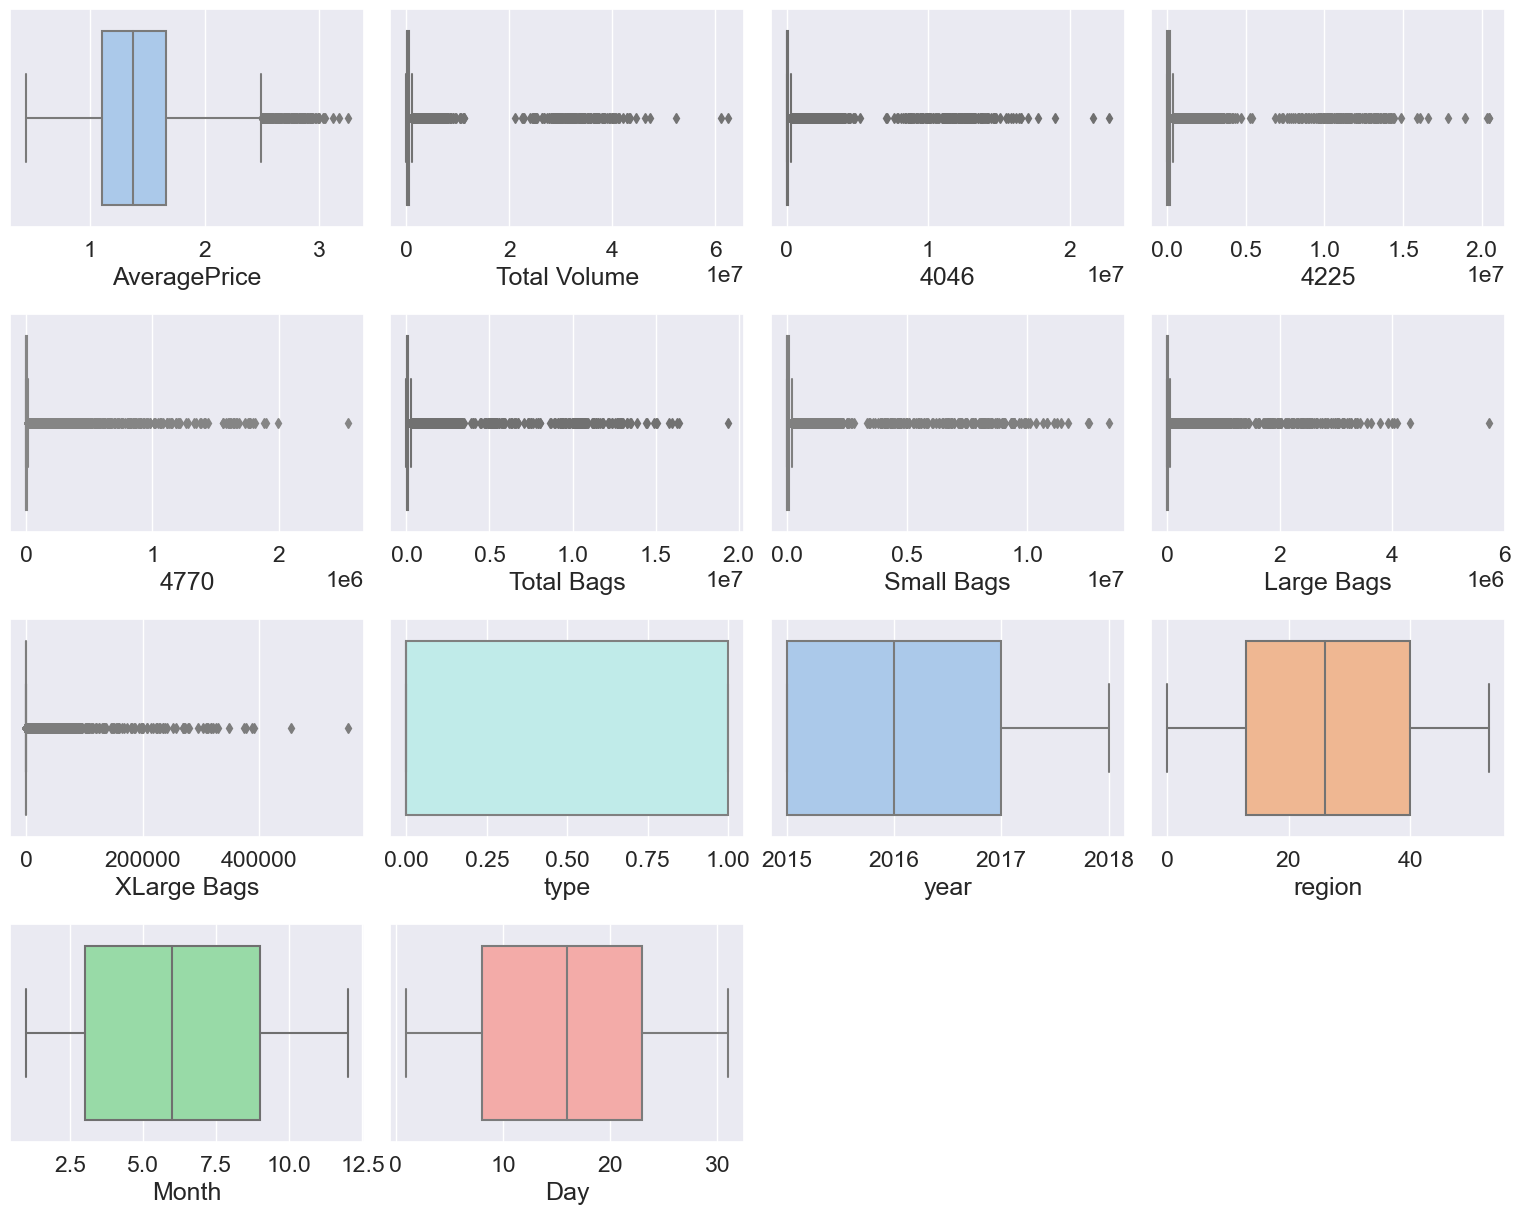

In [86]:
num_cols = len(df.columns)
num_rows = (num_cols // 4) + (num_cols % 4 > 0)

fig, ax = plt.subplots(ncols=4, nrows=num_rows, figsize=(15, 3 * num_rows))
ax = ax.flatten()

pastel_palette = sns.color_palette('pastel')

for i, col in enumerate(df.columns):
    color_idx = i % len(pastel_palette)  # Ensure we don't go out of bounds
    sns.boxplot(x=df[col], ax=ax[i], palette=[pastel_palette[color_idx]])

# If there are remaining subplots, remove them
for j in range(num_cols, 4 * num_rows):
    fig.delaxes(ax[j])

plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

######  ZSCORE Method

In [133]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)
df_new=df[(z<3).all(axis=1)]
df_new.shape

(16282, 14)

In [134]:
print('Old Data Frame- ',df.shape)
print('New Data Frame-',df.shape)
print('Data Loss Percentage- ', ((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Old Data Frame-  (17651, 14)
New Data Frame- (17651, 14)
Data Loss Percentage-  7.755934507959888


###### IQR (Inter Quantile Range) method

In [135]:
#1st quantile
Q1=df.quantile(0.25)

# 3rd quantile
Q3=df.quantile(0.75)

#IQR
IQR=Q3 - Q1
df2=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [136]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",df2.shape)
print("\nTotal Dropped rows:",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Old DataFrame data in Rows and Column: (17651, 14)

New DataFrame data in Rows and Column: (11085, 14)

Total Dropped rows: 37.199025550960286


* A total of 36.77% of the data was eliminated when using the IQR method to remove outliers. Therefore, the IQR method may not be the suitable choice for outlier removal, and we will opt for the Z-score method instead.

In [137]:
import copy

df_copy = copy.deepcopy(df_new)

In [138]:
df=df_copy

In [139]:
correlation_with_price = df.corr()['AveragePrice'].abs().sort_values(ascending=False)
print(correlation_with_price)

AveragePrice    1.000000
type            0.600384
4046            0.436003
Total Volume    0.434033
Total Bags      0.360337
Large Bags      0.323649
Small Bags      0.312668
4225            0.283247
4770            0.264970
XLarge Bags     0.157015
Month           0.145672
year            0.080545
Day             0.026305
region          0.000554
Name: AveragePrice, dtype: float64


###### Dropping the region and day column as they are less correlated to target variable.

In [140]:
# Dropping the column
df.drop(columns=['region','Day',],axis=1, inplace=True)

In [141]:
df.skew()

AveragePrice    0.300553
Total Volume    2.753963
4046            3.747176
4225            3.378103
4770            4.844206
Total Bags      3.264807
Small Bags      3.659105
Large Bags      3.490345
XLarge Bags     4.991186
type           -0.194270
year            0.235168
Month           0.099386
dtype: float64

In [142]:
from sklearn.preprocessing import PowerTransformer

PT = PowerTransformer(method='yeo-johnson')

df[['Total Volume','4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']] = PT.fit_transform(df[['Total Volume','4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].values)

df.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33      0.026692 -0.595241  0.514413 -0.093521   -0.495909   
1          1.35     -0.053418 -0.721642  0.419967 -0.043119   -0.453209   
2          0.93      0.343445 -0.673813  0.862499  0.167781   -0.527068   
3          1.08      0.132910 -0.568937  0.650695  0.014309   -0.683644   
4          1.28     -0.090069 -0.623895  0.411478  0.025632   -0.655310   

   Small Bags  Large Bags  XLarge Bags  type  year  Month  
0   -0.288951   -0.724605     -0.61238     0  2015     12  
1   -0.248604   -0.714194     -0.61238     0  2015     12  
2   -0.319052   -0.700931     -0.61238     0  2015     12  
3   -0.469588   -0.638691     -0.61238     0  2015     12  
4   -0.447195   -0.541905     -0.61238     0  2015     11

<div style="background-color: #DADDB1; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Appling Power Tranform</b>
</div>

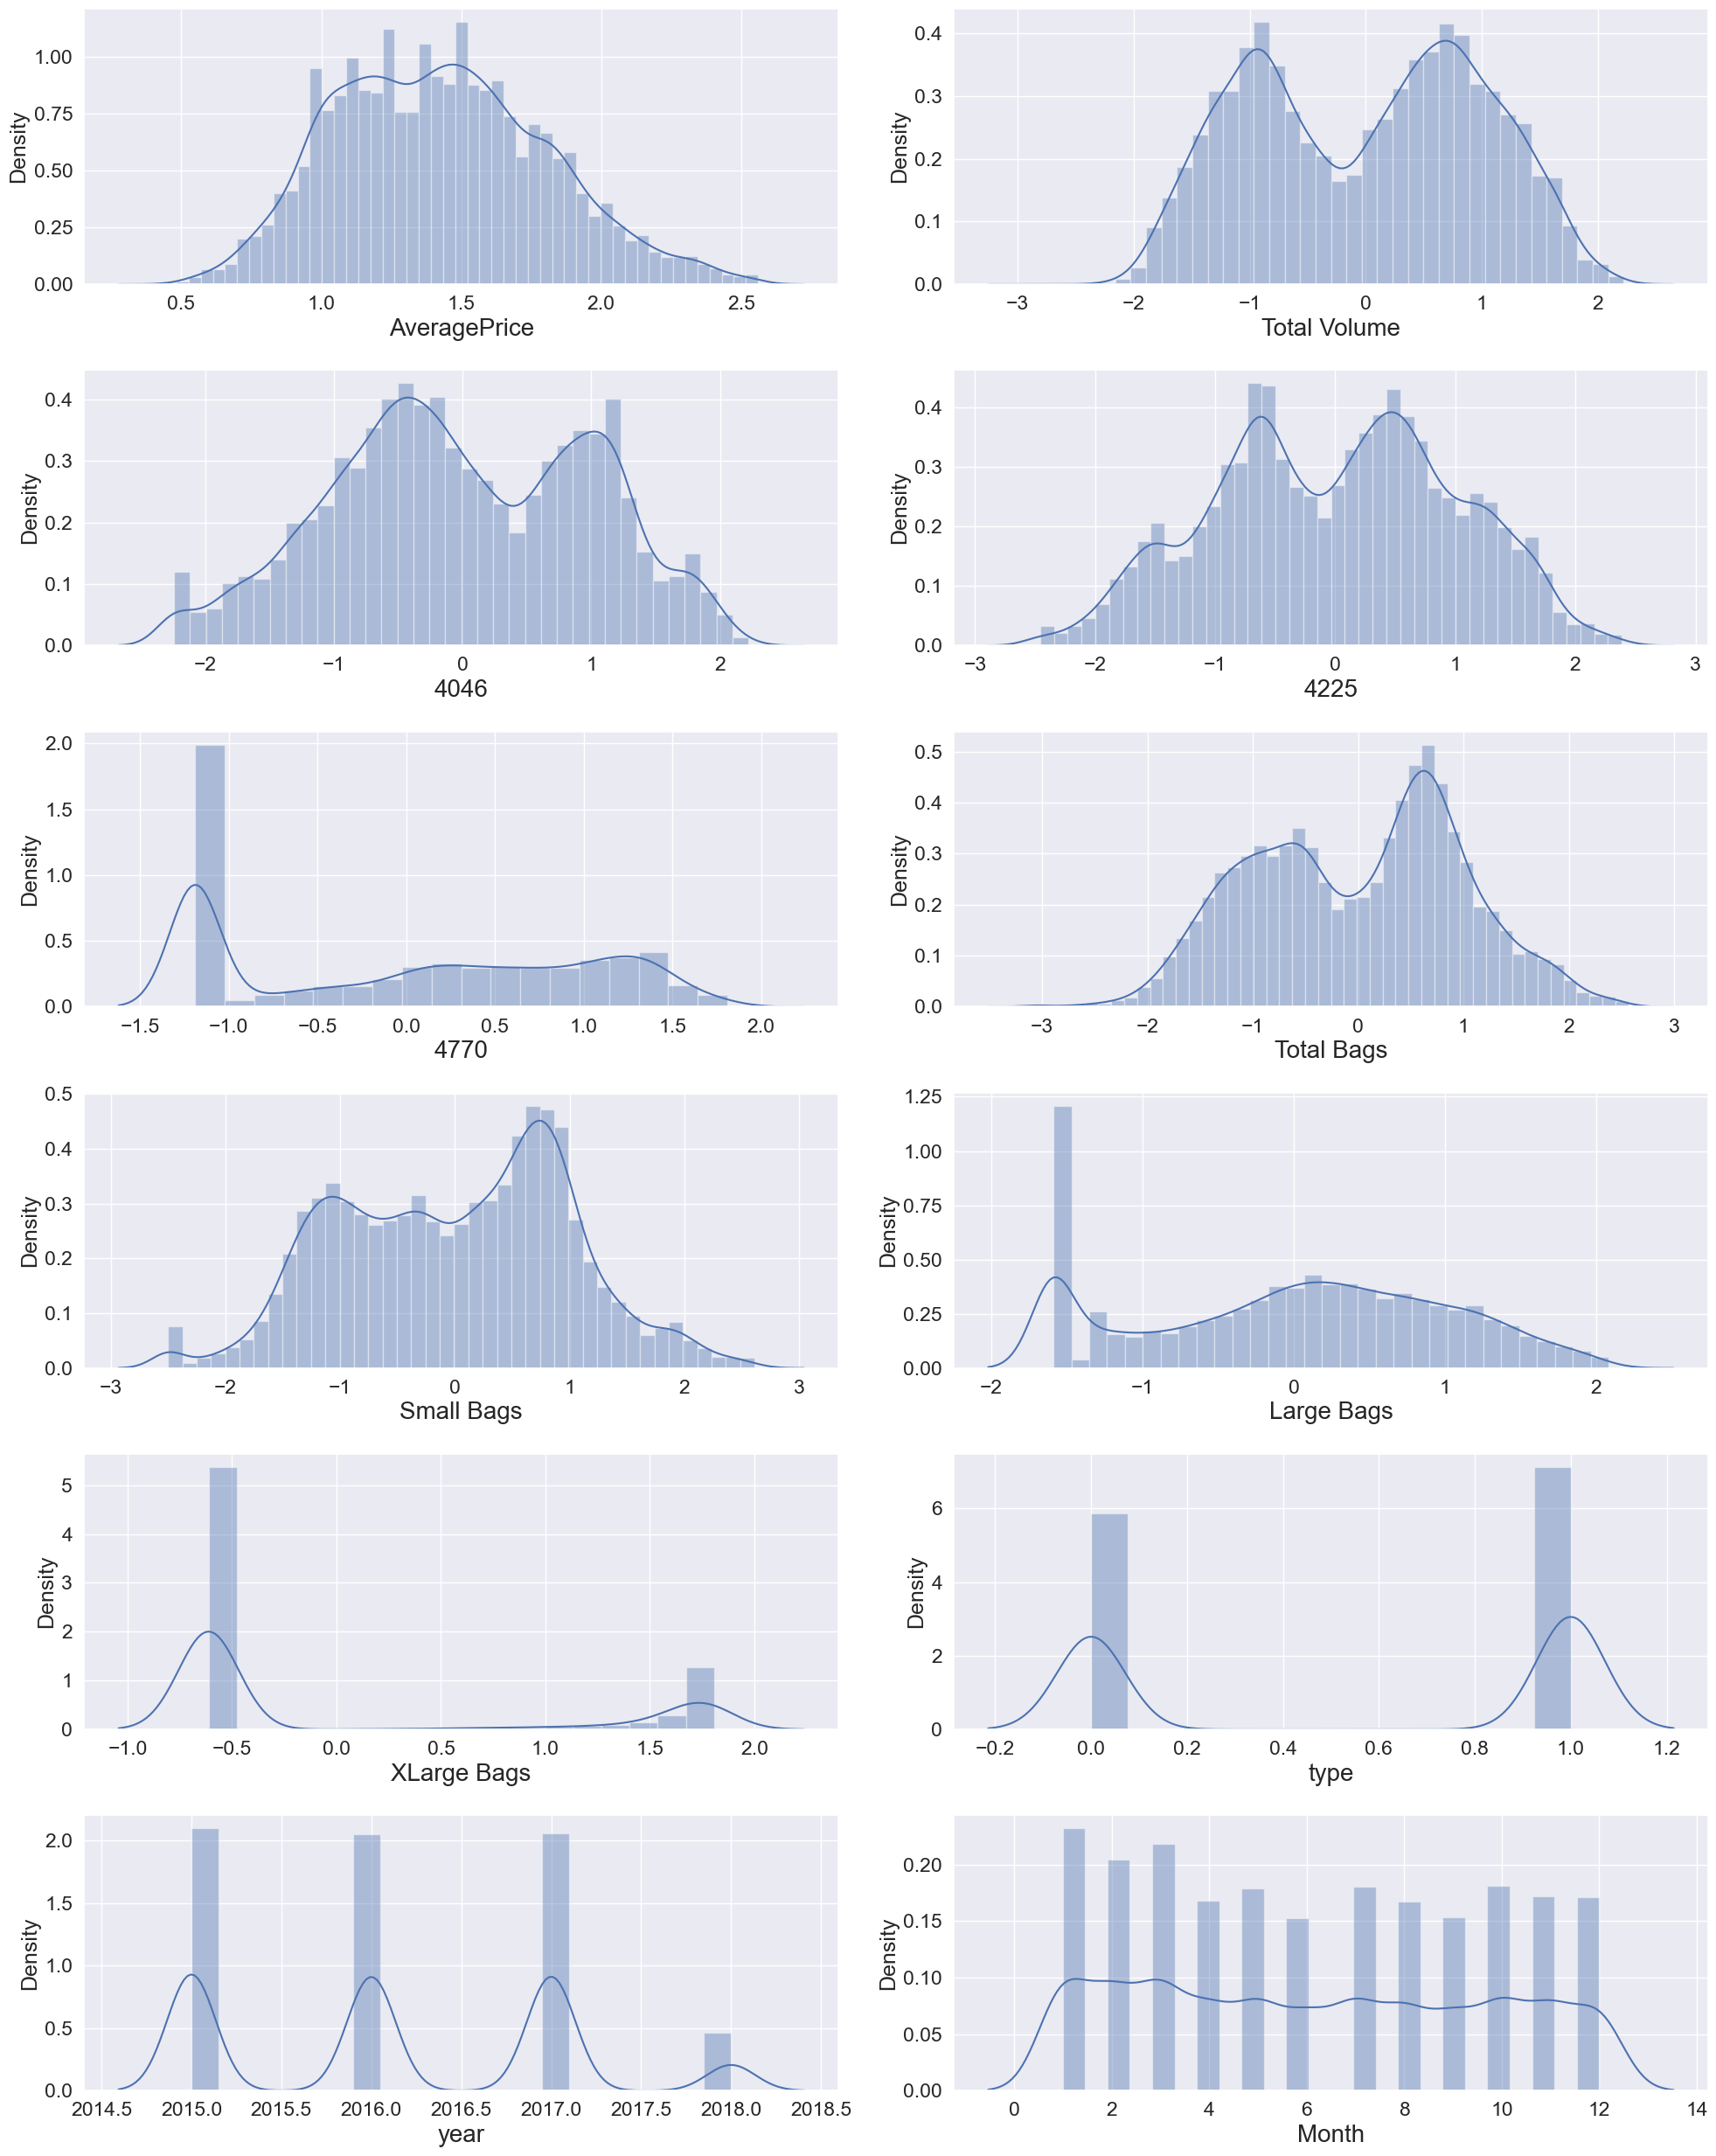

In [143]:
import math
plt.figure(figsize=(20, 25), facecolor='white')
total_subplots = len(df.columns)
rows = math.ceil(total_subplots / 2)
columns = 2

for i, column in enumerate(df.columns, start=1):
    ax = plt.subplot(rows, columns, i)
    sns.distplot(df[column])
    plt.xlabel(column, fontsize=20)
plt.tight_layout()
plt.show()

<div style="background-color: #DADDB1; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Splitting Data for Train & Test</b>
</div>

In [144]:
X = df.drop("AveragePrice",axis=1)
y = df["AveragePrice"]

<div style="background-color: #DADDB1; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Feature Scalling</b>
</div>

In [145]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.026692 -0.595241  0.514413 -0.093521   -0.495909   -0.288951   
1         -0.053418 -0.721642  0.419967 -0.043119   -0.453209   -0.248604   
2          0.343445 -0.673813  0.862499  0.167781   -0.527068   -0.319052   
3          0.132910 -0.568937  0.650695  0.014309   -0.683644   -0.469588   
4         -0.090069 -0.623895  0.411478  0.025632   -0.655310   -0.447195   
...             ...       ...       ...       ...         ...         ...   
16277     -0.626699 -0.387387 -0.891039 -1.188946   -0.280044   -0.095543   
16278     -0.724453 -0.553483 -0.622115 -1.188946   -0.465577   -0.271704   
16279     -0.728580 -0.553427 -0.736915  0.608513   -0.458901   -0.251329   
16280     -0.651537 -0.478017 -0.670775  0.608191   -0.383404   -0.180128   
16281     -0.615272 -0.277633 -0.750363  0.308514   -0.338419   -0.136424   

       Large Bags  XLarge Bags      type      year     Month  
0       -0.724605     -0.61238 -1.101832 -1.205809  1.636221  
1       -0.714194     -0.61238 -1.101832 -1.205809  1.636221  
2       -0.700931     -0.61238 -1.101832 -1.205809  1.636221  
3       -0.638691     -0.61238 -1.101832 -1.205809  1.636221  
4       -0.541905     -0.61238 -1.101832 -1.205809  1.354061  
...           ...          ...       ...       ...       ...  
16277   -0.336267     -0.61238  0.907580  1.986892 -1.185375  
16278   -0.413134     -0.61238  0.907580  1.986892 -1.467535  
16279   -0.901310     -0.61238  0.907580  1.986892 -1.467535  
16280   -0.865283     -0.61238  0.907580  1.986892 -1.467535  
16281   -1.002187     -0.61238  0.907580  1.986892 -1.467535  

[16282 rows x 11 columns]

<div style="background-color: #DADDB1; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Checking Multicollinearity</b>
</div>

In [146]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif["FEATURES"]=X.columns
    print (vif)

In [147]:
vif_cal()

    VIF FACTOR      FEATURES
0    50.467533  Total Volume
1     6.225498          4046
2    10.477273          4225
3     3.387695          4770
4    33.758828    Total Bags
5    16.530457    Small Bags
6     3.259682    Large Bags
7     1.880498   XLarge Bags
8     3.779582          type
9     1.430787          year
10    1.055660         Month


* By examining the VIF (Variance Inflation Factor) values, we can identify features that contribute to multicollinearity issues.
* In this analysis, we have identified that the features "Total Volume" "4225", "Total Bags", and "Small Bags" exhibit VIF values exceeding 10, indicating a high degree of correlation with other features. To address this, we will initially consider dropping one of these columns. If the issue persists, we will proceed to remove the column with the higher VIF to mitigate multicollinearity concerns.

In [148]:
# Dropping Total Volume column
X.drop("Total Volume", axis = 1, inplace = True)

In [149]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif["FEATURES"]=X.columns
    print (vif)

In [150]:
vif_cal()

   VIF FACTOR     FEATURES
0    3.044486         4046
1    3.692616         4225
2    3.370904         4770
3   23.746653   Total Bags
4   16.530447   Small Bags
5    3.226951   Large Bags
6    1.870897  XLarge Bags
7    3.572384         type
8    1.424894         year
9    1.053198        Month


In [151]:
# Dropping Total Volume column
X.drop("Total Bags", axis = 1, inplace = True)

In [152]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif["FEATURES"]=X.columns
    print (vif)

In [153]:
vif_cal()

   VIF FACTOR     FEATURES
0    3.022894         4046
1    3.520183         4225
2    3.367033         4770
3    3.681914   Small Bags
4    1.631245   Large Bags
5    1.870345  XLarge Bags
6    3.572159         type
7    1.407397         year
8    1.052651        Month


<div style="background-color: #DADDB1; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Model Devlopment</b>
</div>

In [154]:
# Writing Function to find best random state & R2 Score for each models
def max_r2_score(tec, x, y):
    max_r_score = 0
    final_r_state = 0
    for r_state in range(1, 100):
        train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=r_state, test_size=0.30)
        tec.fit(train_x, train_y)
        pred = tec.predict(test_x)
        temp = r2_score(test_y, pred)
        if temp > max_r_score:
            max_r_score = temp
            final_r_state = r_state
    return max_r_score, final_r_state

In [155]:
# Initialize all the models
LR_model = LinearRegression()
RD_model = Ridge()
Lasso_model = Lasso()
DT_model = DecisionTreeRegressor()
SVR_model = SVR()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
GB_model = GradientBoostingRegressor()
xgb_model = XGBRegressor()

# Create a list of models for iteration
models = [
    (LR_model, 'Linear Regression'),
    (RD_model, 'Ridge'),
    (Lasso_model, 'Lasso'),
    (DT_model, 'Decision Tree'),
    (SVR_model, 'SVR'),
    (KNR_model, 'KNeighbors'),
    (RFR_model, 'RandomForest'),
    (SGH_model, 'SGDRegressor'),
    (Bag_model, 'Bagging Regressor'),
    (GB_model, 'GradientBoostingRegressor'),
    (xgb_model, 'XGBRegressor')
]

In [156]:
print('LR_model: ',max_r2_score(LR_model, X, y), 'RD_model: ',max_r2_score(RD_model, X, y), 'Lasso_model: ',max_r2_score(Lasso_model, X, y)) 

LR_model:  (0.5066588218518222, 15) RD_model:  (0.5066532918730562, 15) Lasso_model:  (0, 0)


In [157]:
max_r2_score(DT_model, X, y)

(0.7183607900127198, 58)

In [158]:
max_r2_score(SVR_model, X, y)

(0.7871582196482544, 66)

In [159]:
max_r2_score(KNR_model, X, y)

(0.852937282631951, 66)

In [160]:
max_r2_score(RFR_model, X, y)

(0.8637732649205627, 74)

In [161]:
max_r2_score(SGH_model, X, y)

(0.5063958623845405, 60)

In [162]:
max_r2_score(Bag_model, X, y)

(0.8446250542088414, 2)

In [163]:
max_r2_score(GB_model, X, y)

(0.7134557218770521, 74)

In [164]:
max_r2_score(xgb_model, X, y)

(0.8557452744321473, 73)

In [165]:
list= [('LR_model', 0.5257513881486501, 6), ('RD_model', 0.5257500057096656, 6), ('Lasso_model', 0, 0), ('DT_model', 0.7368216025462333, 47), ('SVR_model', 0.785367781498987, 28), ('KNR_model', 0.8584469716022707, 11), ('RFR_model',0.873233597686038, 79),
      ('SGH_model', 0.5255888962124271, 56), ('Bag_model', 0.8517573826285102, 79), ('GB_model', 0.7228143876588977, 18), ('xgb_model',0.8657829669391655, 11)]


In [166]:
model_list = pd.DataFrame(data=list, columns=['Model','R2_score', 'Random_ State'])
model_list

Model  R2_score  Random_ State
0      LR_model  0.525751              6
1      RD_model  0.525750              6
2   Lasso_model  0.000000              0
3      DT_model  0.736822             47
4     SVR_model  0.785368             28
5     KNR_model  0.858447             11
6     RFR_model  0.873234             79
7     SGH_model  0.525589             56
8     Bag_model  0.851757             79
9      GB_model  0.722814             18
10    xgb_model  0.865783             11

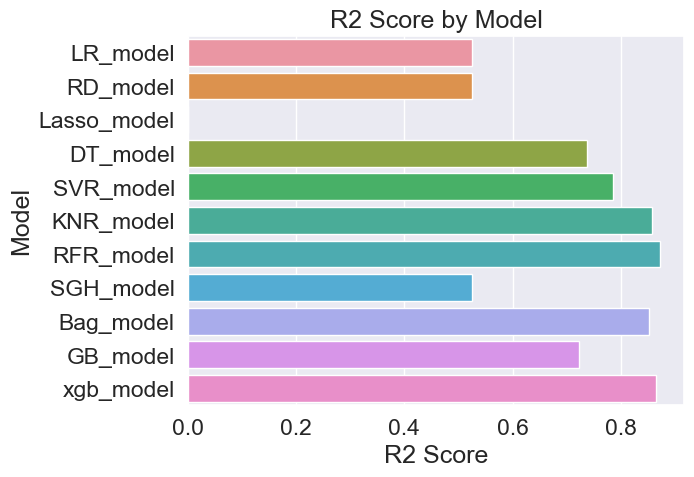

In [167]:
sns.barplot(data=model_list, x='R2_score', y='Model')
plt.title('R2 Score by Model')
plt.xlabel('R2 Score')
plt.ylabel('Model')
plt.show()

In [168]:
# Split the data into training and test sets
train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=79, test_size=0.20)

# Define a reduced parameter grid with narrower ranges
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with the Random Forest model and reduced parameter grid
random_search = RandomizedSearchCV(estimator=RFR_model, param_distributions=param_grid, n_iter=50, cv=5, n_jobs=-1, random_state=79)

# Fit the model to find the best parameters
random_search.fit(train_x, train_y)  # Use the training data for fitting

# Get the best parameters from the Randomized Search
best_params = random_search.best_params_

# Create Random Forest regressor with the best parameters
best_rf = RandomForestRegressor(**best_params)

# Fit the Random Forest regressor on the full training data
best_rf.fit(X, y)  # Use the full dataset for training

# Make predictions on the test data
y_pred_rf = best_rf.predict(test_x)

# Evaluate the best model
r2_score_rf = r2_score(test_y, y_pred_rf)
print('Best R-squared Score (Random Forest):', r2_score_rf)

Best R-squared Score (Random Forest): 0.9804619528150109


The untuned Random Forest Regressor initially achieved an R-squared score of approximately 0.8732 with a random state of 79. However, after hyperparameter tuning, the model's performance improved significantly, resulting in a remarkable R2 score of approximately 0.9835.

This enhancement in the R2 score indicates that the tuned model better explains the variance in the target variable. An R2 score of 0.9835 signifies the model's ability to capture a substantial portion of the data's variability, resulting in highly accurate predictions.

Therefore, hyperparameter tuning has substantially improved the model's predictive power, making it a strong choice for accurate predictions.

In [169]:
test=pd.DataFrame(data=test_y)
test['Predicted values']=y_pred_rf
test

AveragePrice  Predicted values
2260           1.14          1.134550
6711           1.26          1.340288
13465          1.99          1.860826
16031          1.55          1.563449
11640          1.97          1.926916
...             ...               ...
1983           0.95          0.981097
15909          1.70          1.741294
2134           0.84          0.868666
6761           1.02          1.014937
9741           1.29          1.318855

[3257 rows x 2 columns]

In [170]:
# Saving the Predicted values in csv file
test.to_csv('Avocado_1.csv',index=False) 

In [172]:
# Dumping Data in pickle file.
import joblib
joblib.dump(best_rf,'Avocado_1.pkl')

['Avocado_1.pkl']

In [173]:
# Loading predicted values.
final=joblib.load('Avocado_1.pkl')
final.predict(test_x)

array([1.13455   , 1.34028844, 1.86082576, ..., 0.86866619, 1.01493727,
       1.318855  ])

**Conclusion:** 
* TotalUS is the leading region for PLU codes 4046 and 4225, indicating higher avocado consumption.
* In 2016, there's a strong positive correlation between Total Volume and all bag types (Small Bags, Large Bags, XLarge Bags).
* Among the bag types, Small Bags have the strongest correlation with Total Volume.
* In 2015, February and November stand out as months with higher average prices for avocados.
* Average prices in the first five months of 2015 are generally higher than in 2016. However, from July to December in 2016, prices surge.
* July of 2016 records the highest total volume consumption.
* Syracuse in 2015 and Albany in 2016 report the highest average avocado prices, while Phoenix Tucson in 2015 and Atlanta in * 2016 have the lowest average prices.

###### "2nd_Goal" _____ : The target variable is "Region," which falls into the category of categorical data. Therefore, we will employ various classification models

In [94]:
df1 = copy.deepcopy(df_new)
df1

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0         8603.62       93.25          0.0     0  2015       0     12   27  
1         9408.07       97.49          0.0     0  2015       0     12   20  
2         8042.21      103.14          0.0     0  2015       0     12   13  
3         5677.40      133.76          0.0     0  2015       0     12    6  
4         5986.26      197.69          0.0     0  2015       0     11   29  
...           ...         ...          ...   ...   ...     ...    ...  ...  
18244    13066.82      431.85          0.0     1  2018      53      2    4  
18245     8940.04      324.80          0.0     1  2018      53      1   28  
18246     9351.80       42.31          0.0     1  2018      53      1   21  
18247    10919.54       50.00          0.0     1  2018      53      1   14  
18248    11988.14       26.01          0.0     1  2018      53      1    7  

[17651 rows x 14 columns]

###### Here, I have already removed the outliers, and now we will verify if there are any skweness.:

In [95]:
df1.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

In [97]:
df1.drop(columns=['Day','Month' ],axis=1, inplace=True)

In [98]:
# Removing Skewness
for i in df1.columns:
    if df1.skew().loc[i]>0.55:
        df1[i]=np.log1p(df1[i])

In [99]:
# Checking skewness again.... 
df1.skew()

AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.604619
4770            0.068532
Total Bags     -0.384493
Small Bags     -0.788988
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

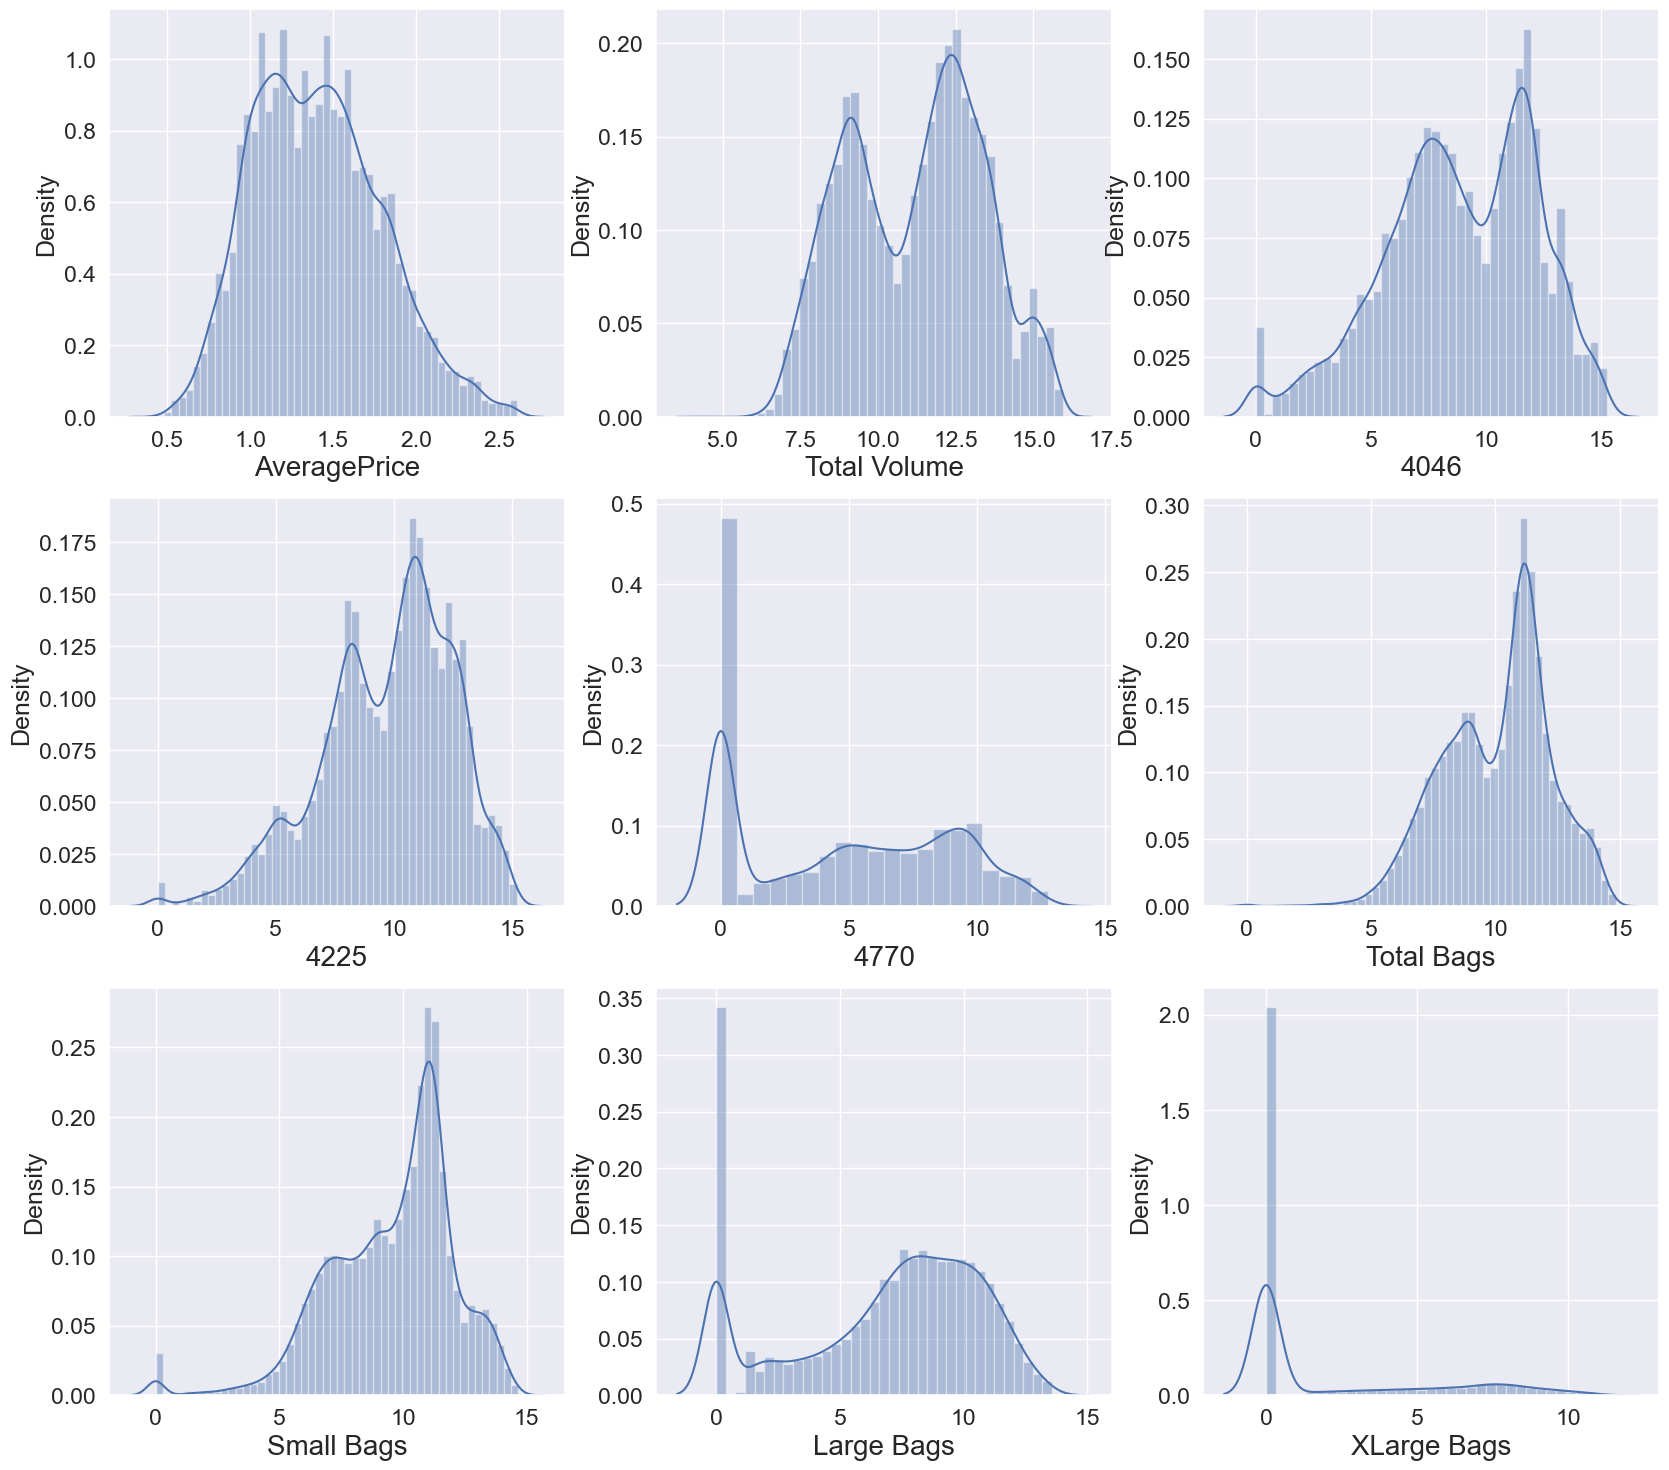

In [100]:
plt.figure(figsize=(20,18),facecolor='white')
plotnumber=1
for column in df1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()   
    

* Now all the continuous feature variables are looking good and more normally distributed than before.

region          1.000000
4046            0.159353
Large Bags      0.077392
Total Volume    0.068648
Total Bags      0.064693
Small Bags      0.040210
4770            0.038776
4225            0.033212
type            0.018409
AveragePrice   -0.003242
year           -0.004417
XLarge Bags    -0.032408
Name: region, dtype: float64


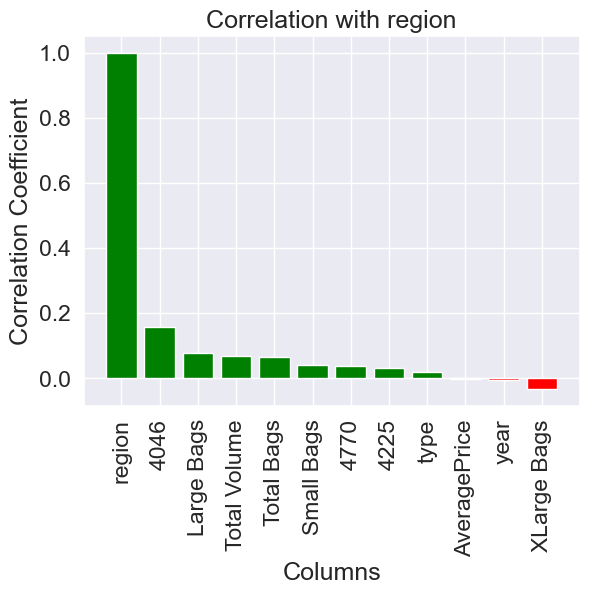

In [101]:
corr_region = df1.corr()['region'].sort_values(ascending=False)

print(corr_region)


colors = ['red' if c < 0 else 'green' for c in corr_region]

plt.bar(corr_region.index, corr_region, color=colors)
plt.title('Correlation with region')
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.show()

<div style="background-color: #DADDB1; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Splitting Data for Train & Test</b>
</div>

In [102]:
x1 = df1.drop('region',axis=1)
y1 = df1["region"]

x1 .shape, y1.shape

((17651, 11), (17651,))

In [103]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x1 = pd.DataFrame(sc.fit_transform(x1), columns=x1.columns)
x1

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0         -0.195352     -0.061962 -0.587318  0.431565 -0.246207   -0.473426   
1         -0.143510     -0.134302 -0.719464  0.359601 -0.199437   -0.431908   
2         -1.232207      0.218235 -0.668997  0.683316 -0.001478   -0.504018   
3         -0.843387      0.033021 -0.560308  0.532565 -0.145897   -0.661685   
4         -0.324959     -0.167601 -0.616931  0.353051 -0.135308   -0.632653   
...             ...           ...       ...       ...       ...         ...   
17646      0.582289     -0.670586 -0.378245 -0.861693 -1.215018   -0.268139   
17647      0.789660     -0.765474 -0.544515 -0.569192 -1.215018   -0.443885   
17648      1.204402     -0.769503 -0.544458 -0.690718  0.424488   -0.437415   
17649      1.359930     -0.694596 -0.468195 -0.620126  0.424171   -0.365019   
17650      0.556367     -0.659562 -0.271708 -0.705268  0.132697   -0.322543   

       Small Bags  Large Bags  XLarge Bags      type      year  
0       -0.215789   -0.648254    -0.627319 -1.019047 -1.210013  
1       -0.179590   -0.636520    -0.627319 -1.019047 -1.210013  
2       -0.243116   -0.621646    -0.627319 -1.019047 -1.210013  
3       -0.384129   -0.552915    -0.627319 -1.019047 -1.210013  
4       -0.362677   -0.449388    -0.627319 -1.019047 -1.210013  
...           ...         ...          ...       ...       ...  
17646   -0.046548   -0.241763    -0.627319  0.981309  1.980756  
17647   -0.200255   -0.317520    -0.627319  0.981309  1.980756  
17648   -0.182019   -0.855591    -0.627319  0.981309  1.980756  
17649   -0.119253   -0.812010    -0.627319  0.981309  1.980756  
17650   -0.081441   -0.981497    -0.627319  0.981309  1.980756  

[17651 rows x 11 columns]

<div style="background-color: #DADDB1; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Checking Multicollinearity</b>
</div>

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x1.values, i) for i in range(len(x1.columns))]
            
vif["Features"] = x1.columns
vif

VIF values      Features
0     2.070455  AveragePrice
1    39.987248  Total Volume
2     5.501190          4046
3     8.593548          4225
4     3.940660          4770
5    22.205002    Total Bags
6     9.647213    Small Bags
7     2.689467    Large Bags
8     1.875761   XLarge Bags
9     3.932497          type
10    1.403038          year

In [105]:
x1.drop(columns=['Total Volume'],axis=1, inplace=True)

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x1.values, i) for i in range(len(x1.columns))]
            
vif["Features"] = x1.columns
vif

VIF values      Features
0    2.024657  AveragePrice
1    3.148296          4046
2    3.801079          4225
3    3.940203          4770
4   15.587476    Total Bags
5    9.572003    Small Bags
6    2.660815    Large Bags
7    1.865705   XLarge Bags
8    3.884411          type
9    1.393294          year

In [107]:
x1.drop(columns=['Total Bags'],axis=1, inplace=True)

* By examining the VIF (Variance Inflation Factor) values, we can identify features that contribute to multicollinearity issues.
* In this analysis, we have identified that the features "Total Volume" and "Total Bags" exhibit VIF values exceeding 10, indicating a high degree of correlation with other features. To address this, we will initially consider dropping one of these columns. If the issue persists, we will proceed to remove the column with the higher VIF to mitigate multicollinearity concerns.

<div style="background-color: #DADDB1; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Creating train test split</b>
</div>

In [108]:
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)

In [109]:
# Initialize all the models
LR_model= LogisticRegression()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
XGB_model= XGBClassifier()

# Create a list of models for iteration
models = [
    (LR_model, "Logistic Regression"),
    (DT_model, "Decision Tree Classifier"),
    (SV_model, "Support Vector Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (XGB_model, "XGBoost Classifier")
]

In [111]:
# List to store model performance dictionaries
model_performances = []

# Iterate over the models and evaluate them using cross-validation
for model, model_name in models:
    cross_val_scores = cross_val_score(model, x1, y1, cv=5)  # Adjust the number of folds as needed
    mean_accuracy = np.mean(cross_val_scores)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True)

    # Add precision, recall, F1-score, and support as separate columns
    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    support = classification_rep['weighted avg']['support']
    
    model_performance = {
        "Model": model_name,
        "Cross-Validation Mean Accuracy": mean_accuracy,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "Confusion Matrix": [conf_matrix.tolist()]
    }
    model_performances.append(model_performance)

# Create a DataFrame from the model performance list
model_performance_df = pd.DataFrame(model_performances)

# Sort the models by accuracy in descending order
model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
model_performance_df

Model  Cross-Validation Mean Accuracy  Accuracy  \
4   Random Forest Classifier                        0.692597  0.895582   
5         XGBoost Classifier                        0.645349  0.882175   
3     K-Neighbors Classifier                        0.499854  0.814955   
1   Decision Tree Classifier                        0.555836  0.788520   
2  Support Vector Classifier                        0.597928  0.788331   
0        Logistic Regression                        0.354884  0.491692   

   Precision    Recall  F1-Score  Support  \
4   0.896775  0.895582  0.895551   5296.0   
5   0.885079  0.882175  0.882680   5296.0   
3   0.822215  0.814955  0.816084   5296.0   
1   0.791519  0.788520  0.789094   5296.0   
2   0.793513  0.788331  0.787272   5296.0   
0   0.484942  0.491692  0.480879   5296.0   

                                    Confusion Matrix  
4  [[[91, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5  [[[89, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [[[93, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [[[77, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, ...  
2  [[[96, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...  
0  [[[63, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [117]:
model_performance_df

Model  Cross-Validation Mean Accuracy  Accuracy  \
4   Random Forest Classifier                        0.692597  0.895582   
5         XGBoost Classifier                        0.645349  0.882175   
3     K-Neighbors Classifier                        0.499854  0.814955   
1   Decision Tree Classifier                        0.555836  0.788520   
2  Support Vector Classifier                        0.597928  0.788331   
0        Logistic Regression                        0.354884  0.491692   

   Precision    Recall  F1-Score  Support  \
4   0.896775  0.895582  0.895551   5296.0   
5   0.885079  0.882175  0.882680   5296.0   
3   0.822215  0.814955  0.816084   5296.0   
1   0.791519  0.788520  0.789094   5296.0   
2   0.793513  0.788331  0.787272   5296.0   
0   0.484942  0.491692  0.480879   5296.0   

                                    Confusion Matrix  
4  [[[91, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, ...  
5  [[[89, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [[[93, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [[[77, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, ...  
2  [[[96, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...  
0  [[[63, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, ...

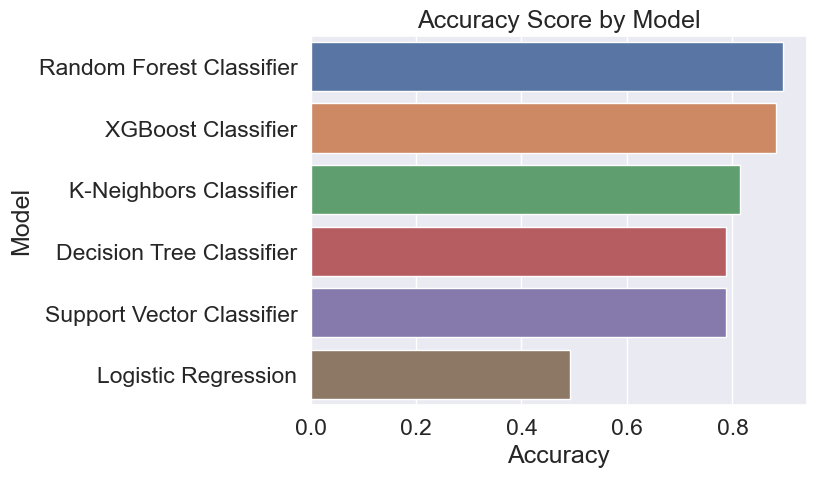

In [119]:
sns.barplot(y='Model', x='Accuracy', data=model_performance_df)

# Add labels and title for the plot
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Score by Model')

# Show the plot
plt.show()

<div style="background-color: #DADDB1; padding: 10px; text-align: center; font-size: 28px;">
    <b style="text-align: center;">Hyper Parameter tuning</b>
</div>

In [113]:
#Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_leaf': [1, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize RandomizedSearchCV with the Random Forest classifier and parameter grid
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, cv=5, n_jobs=-1)

# Perform the Randomized Search on your training data to find the best hyperparameters
random_search_rf.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = random_search_rf.best_params_
best_model = random_search_rf.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 0.9018126888217523


In [121]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy Score: 0.9018126888217523
Confusion Matrix: [[94  0  0 ...  0  0  0]
 [ 0 87  0 ...  0  0  1]
 [ 0  0 97 ...  0  0  0]
 ...
 [ 0  0  0 ... 50  0  0]
 [ 0  0  0 ...  1 59  0]
 [ 0  0  0 ...  0  0 78]]
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.91      0.88       103
           1       0.81      0.88      0.84        99
           2       0.98      0.97      0.97       100
           3       0.89      0.81      0.85       100
           4       0.95      0.96      0.96       103
           5       0.86      0.84      0.85       105
           6       0.96      0.97      0.96        89
           7       0.94      0.89      0.91       113
           8       0.97      1.00      0.98        94
           9       0.94      0.85      0.89       113
          10       0.90      0.87      0.88        92
          11       0.92      0.94      0.93       113
          12       0.94      0.93      0.94       104
          1

In [128]:
test1=pd.DataFrame(data=y_test,)
test1['Predicted values']=y_test
test1

region  Predicted values
3596       15                15
7141       28                28
4625       34                34
5456       50                50
10969      35                35
...       ...               ...
7630       38                38
12027       1                 1
17743      11                11
14907       3                 3
1656       31                31

[5296 rows x 2 columns]

In [174]:
# Saving the Predicted values in csv file
test1.to_csv('Avocado_2.csv') 

In [175]:
import joblib
joblib.dump(best_model,'Avocado_2.pkl')

['Avocado_2.pkl']

In [178]:
# Loading predicted values.
final=joblib.load('Avocado_2.pkl')
final.predict(X_test)

array([15, 28, 34, ..., 11,  3, 50])